<div class="alert alert-block alert-success">
<h1> Cars 4 You:
Expediting Car Evaluations with ML </h1>
<h3> Group 43 </h3>
<h4> António Parafita (20250363), Bernardo Esteves (20250484), Diogo Coutinho (20250423) </h4>
<h4> Professor Roberto Henriques and Professor Ricardo Santos </h4>
<h5> Master in Data Science and Advanced Analytics </h5>
<h5> NOVA Information Management School
- Universidade Nova de Lisboa
 </h5>
<h5> Fall Semester 2025/2026 </h5>

## **Index**<br>

[**Abstract**](#)<br>

[1. **Imports**](#)<br>
- [1.1 Import Libraries](#)<br>
- [1.2 Import Data](#)<br>

[2. **Data Overview**](#)<br>
 - [2.1 Data Information](#)<br>
 - [2.2 Missing Values](#)<br>
 - [2.3 Data Description](#)<br>

[3. **Initial Preprocessing**](#)<br>
- [3.1 Standardize Categorical Features](#)<br>
    - [3.1.1 Fuel Type](#)<br>
    - [3.1.2 Transmission](#)<br>
    - [3.1.3 Brand](#)<br>
    - [3.1.4 Model](#)<br>
        - [3.1.4.1 Handle Unidentified Model Values](#)<br>
- [3.2 Impossible Values](#)<br>
    - [3.2.1 Train Dataset](#)<br>
    - [3.2.2 Test Dataset](#)<br>

[4. **Exploratory Data Analysis (EDA)**](#)<br>
- [4.1 Categorical Variables Distribution](#)<br>
- [4.2 Target Distribution](#)<br>
- [4.3 Feature Engineering](#)<br>
- [4.4 Numerical Variables Distribution and Outlier Analysis](#)<br>
- [4.5 Correlation Matrix](#)<br>

[5. **Modelling Preprocessing**](#)<br>
- [5.1 Imputation](#)<br>
- [5.2 Outlier Handling](#)<br>
- [5.3 One-Hot Encoding](#)<br>
- [5.4 Target Encoding](#)<br>
- [5.5 Feature Selection](#)<br>
- [5.6 Scaling](#)<br>

[6. **Model Assessment**](#)<br>
- [6.1 Models Configuration](#)<br>
- [6.2 Benchmarking](#)<br>
- [6.3 Hyper-Parameter Tuning](#)<br>
- [6.4 Open-Ended Section](#)<br>
- [6.5 Deployment](#)<br>

[7. **GitHub Public Project**](#)<br>

<a class="anchor" id="1st-bullet">    </a>
# Group Member Contribution 

**António Parafita**: Modeling Preprocessing, Benchmarking, Open-Ended Section, Deployment

**Bernardo Esteves**: Preprocessing, EDA, Model Assessment, Open-Ended Section, Deployment

**Diogo Coutinho**: Preprocessing, EDA, Section Comments, Open-Ended Section

<a class="anchor" id="1st-bullet">    </a>
# Abstract

**Cars 4 You** is an online car resale company that sells cars from multiple different brands. However the company’s growth has also led to increasing waiting lists for car inspection, which is driving potential customers to their competitors. To adress this problem, this project aims to create a system capable of **predicting** the price of a car based on the user's input without needing the car to be taken to the mechanic.

With the database from 2020 provided by the company, containing important information about the cars charactheristics, it was possible to create an end-to-end predictive pipeline. Starting with an **initial preprocessing** based on data cleaning process to make the data usable to our predictive model and followed by a **data exploration analysis** to understand how different features behave and their influence on car price prediction. Then finally, a structured modeling workflow was defined including **modelling preprocessing** steps to ensure data consistency and a model assessment strategy based on **cross-validation**. Performance was evaluated using mean absolute error (MAE), aligning with the business objective of minimizing pricing deviations.

Different regression models were explored and optimized through **hyperparameter tuning** and **feature selection** techniques, revealing very different performance across algorithms. The final model was selected based on the MAE score, but was also considered the performance gap between training and validation sets, to avoid the risk of overfitting.

Overall, the results show that optimized regression models can achieve stable price predictions using the information provided by the company, while acknowledging that additional (and informative) feature sets could improve predictive accuracy.

<a class="anchor" id="1st-bullet">    </a>
# 1. Imports

<a class="anchor" id="2st-bullet">    </a>
## 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, kruskal, levene, shapiro, normaltest

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import mutual_info_regression


<a class="anchor" id="3st-bullet">    </a>
## 1.2 Import Data

In [2]:
df_train = pd.read_csv("train.csv").copy()
df_test = pd.read_csv("test.csv").copy()

print(f"Train dataset dimensions: {df_train.shape}")
print(f"Test dataset dimensions: {df_test.shape}")

Train dataset dimensions: (75973, 14)
Test dataset dimensions: (32567, 13)


<a class="anchor" >    </a>
# 2. Data Overview

<a class="anchor">    </a>
## 2.1 Data Information

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


The training dataset contains 13 variables and the target `price`. Of those variables, 12 are features we are going to use for training. From these features `{Brand, model, transmission, fuelType}` are **categorical** and the rest of them are **numerical**. Clearly there are some **missing values** per feature that are going to be adressed during **imputation** for both datasets.

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


The testing dataset it's similar to the training dataset. The key differences are the expected absence of the target variable `price` and the smaller number of observations.

<a class="anchor" >    </a>
## 2.2 Missing Values

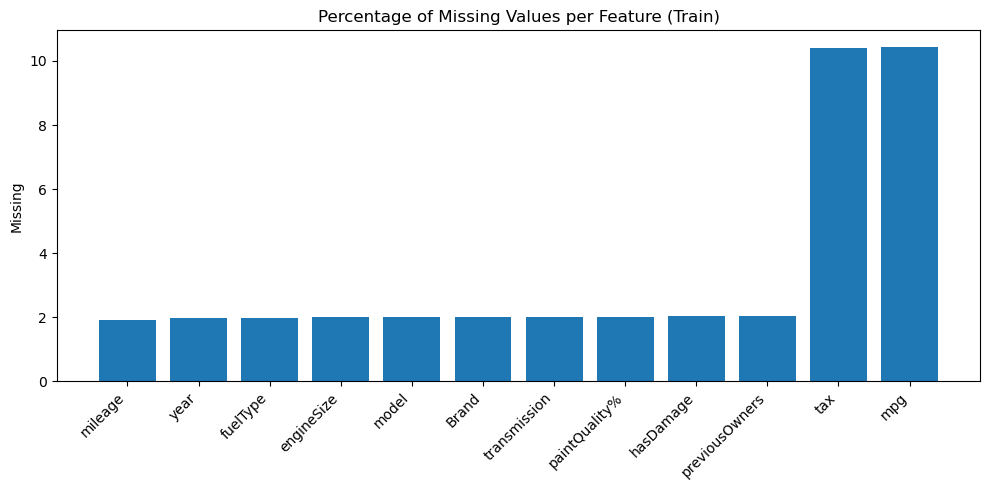

In [5]:
# Columns to exclude
cols_to_exclude_missing = ["price", "carID"]

# Select relevant columns
cols = [col for col in df_train.columns if col not in cols_to_exclude_missing]

# Calculate missing percentage per column 
missing_percentage = df_train[cols].isna().mean().sort_values(ascending=True) * 100

# Plot
plt.figure(figsize=(10, 5))
plt.bar(missing_percentage.index, missing_percentage.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Missing")
plt.title("Percentage of Missing Values per Feature (Train)")
plt.tight_layout()
plt.show()


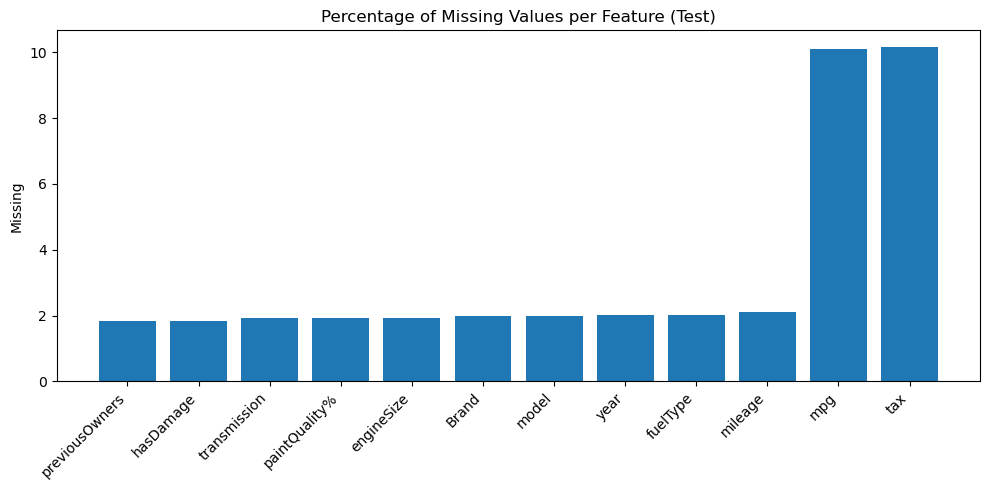

In [6]:
# Select relevant columns
cols = [col for col in df_test.columns if col not in cols_to_exclude_missing]

# Calculate missing percentage per column
missing_percentage = df_test[cols].isna().mean().sort_values(ascending=True) * 100

# Plot
plt.figure(figsize=(10, 5))
plt.bar(missing_percentage.index, missing_percentage.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Missing")
plt.title("Percentage of Missing Values per Feature (Test)")
plt.tight_layout()
plt.show()


The distribution of missing values is similar between the training and test sets. The features `mpg` and `tax` show the highest proportion of missing data (≈10%), while the remaining features have around 2%. The majority of missing values as mentioned before will be handled during the **imputation** stage.


**Quick check for duplicates in both datasets**

In [7]:
df_train['carID'].duplicated().sum()

0

In [8]:
df_test['carID'].duplicated().sum()

0

<a class="anchor" >    </a>
## 2.3 Data Description

In [9]:
df_train.describe()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


In [10]:
df_test.describe()

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,31914.000000,31878.000000,29259.000000,29279.000000,31939.000000,31942.000000,31970.000000,31970.0
mean,92256.000000,2017.102299,22952.658921,120.569239,55.210728,1.665377,64.446667,2.006118,0.0
std,9401.427445,2.207969,22132.758713,65.560570,17.644635,0.574467,21.142188,1.472310,0.0
min,75973.000000,1991.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,84114.500000,2016.000000,7298.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,92256.000000,2017.000000,17225.500000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,100397.500000,2019.000000,32500.000000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,108539.000000,2024.121759,279000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


The descriptive analysis for each dataset provides essential information about all numerical features:

- `year` and `previousOwners` are **discrete** variables but they contain **non-integer entries** that need to be replaced;
  
- All of the numerical features are **positive** but most of them contain **negative entries** that need to be replaced;

- The feature `hasDamage` has **zero variance** meaning it does not provide any useful information for the model. For that reason it should be removed;

- This dataset is from the year **2020** so it doesn't make sense to have entries in the variable `year` higher than 2020. Since that is the case, those rows should be removed in the **training dataset** and replaced in the **testing dataset**;

These adjustments are safely applied during preprocessing, without any risk of data leakage. The presence of outliers is also evident, as some values lie far beyond the expected domain or statistical range. They will be interpreted right after the preprocessing.

<a class="anchor" id="4st-bullet">    </a>
# 3. Preprocessing

<a class="anchor" id="5st-bullet">    </a>
## 3.1 Standardize Categorical Features

Standardizing the categorical features is essentiaI since **raw data contains typographical errors, extra spaces, and inconsistent capitalization** that would otherwise lead to duplicated or mismatched categories.

<a class="anchor" id="6st-bullet">    </a>
### 3.1.1 Fuel Type

In [11]:
def normalize_fuelType(value):
    
    # if it's NaN let it be
    if pd.isna(value):
        return np.nan
    
    # Normalize string (lowercase and eliminate unwanted characters from both ends of a string)
    value = str(value).lower().strip()
    
    if "iese" in value:
        return "Diesel"
    elif "etro" in value:
        return "Petrol"
    elif "ybri" in value:
        return "Hybrid"
    elif "elec" in value:
        return "Electric"
    elif "the" in value:
        return "Other"
    else:
        return "YOU DIDN'T COVER ALL CASES"  # just a random string to check if all cases are listed. If it shows up in the next cell output
                                             # then there is another category we didn't aknowledge

In [12]:
# Apply the function
df_train["fuelType"] = df_train["fuelType"].apply(normalize_fuelType)
df_test["fuelType"] = df_test["fuelType"].apply(normalize_fuelType)

# Verify for both Train and Test datasets if all cases are listed
print(set(df_train["fuelType"]))
print(set(df_test["fuelType"]))

{'Hybrid', 'Other', 'Diesel', 'Electric', nan, 'Petrol'}
{'Hybrid', 'Other', 'Diesel', 'Electric', nan, 'Petrol'}


<a class="anchor" id="6st-bullet">    </a>
### 3.1.2 Transmission

In [13]:
def normalize_transmission(value):
    
    # If it's NaN let it be
    if pd.isna(value):
        return np.nan
    
    # Normalize string
    value = str(value).lower().strip()
    
    if "kno" in value: # Replace "Unknown" with NaN
        return np.nan
    elif "anua" in value:
        return "Manual"
    elif "-" in value:
        return "Semi-Auto"
    elif "toma" in value:
        return "Automatic"
    elif "the" in value:
        return "Other"
    else:
        return "YOU DIDN'T COVER ALL CASES"  # just a random string to check if all cases are listed. If it shows up in the next cell output
                                             # then there is another category we didn't aknowledge

In [14]:
# Apply the function
df_train["transmission"] = df_train["transmission"].apply(normalize_transmission)
df_test["transmission"] = df_test["transmission"].apply(normalize_transmission)

# Verify for both Train and Test datasets if all cases are listed
print(set(df_train["transmission"]))
print(set(df_test["transmission"]))

{'Other', 'Semi-Auto', 'Automatic', nan, 'Manual'}
{'Other', 'Semi-Auto', 'Automatic', nan, 'Manual'}


<a class="anchor" id="7st-bullet">    </a>
### 3.1.3 Brand

In [15]:
def normalize_brand(value):
    
    # If it's NaN let it be
    if pd.isna(value):
        return np.nan
    
    # Normlize string
    value = str(value).lower().strip()
    
    if "ud" in value:
        return "Audi"
    elif "kod" in value:
        return "Skoda"
    elif "erce" in value:
        return "Mercedes"
    elif "yo" in value:
        return "Toyota"
    elif "pe" in value:
        return "Opel"
    elif "yu" in value:
        return "Hyundai"
    elif "or" in value:
        return "Ford"
    elif "b" in value or "mw" in value or value == "m":
        return "BMW"
    elif "v" in value or value == "w":
        return "VW"
    else:
        return "YOU DIDN'T COVER ALL CASES"  # just a random string to check if all cases are listed. If it shows up in the next cell output
                                             # then there is another category we didn't aknowledge

In [16]:
# Apply the function
df_train["Brand"] = df_train["Brand"].apply(normalize_brand)
df_test["Brand"] = df_test["Brand"].apply(normalize_brand)

# Verify for both Train and Test datasets if all cases are listed
print(set(df_train["Brand"]))
print(set(df_test["Brand"]))

{'Mercedes', 'Skoda', 'Hyundai', 'Audi', 'Toyota', 'Ford', nan, 'BMW', 'VW', 'Opel'}
{'Mercedes', 'Skoda', 'Hyundai', 'Audi', 'Ford', 'Toyota', nan, 'BMW', 'VW', 'Opel'}


Next, we establish a BRAND when in a row there **IS** a MODEL but there **ISN´T** a BRAND, using the *brand_models* dictionary.

In [17]:
brand_models = {
    "Skoda": [
        "Fabia", "Octavia", "Superb", "Yeti", "Yeti Outdoor",
        "Citigo", "Kodiaq", "Karoq", "Scala", "Kamiq",
        "Rapid", "Roomster"],
    
    "Hyundai": [
        "Tucson", "Kona", "Santa Fe", "Ioniq", "Getz", "Veloster", "Amica",
        "Accent", "Terracan", "I10", "I20", "I30", "I40", "I800", "IX20", "IX35"],
    
    "Mercedes": [
        "A Class", "B Class", "C Class", "E Class", "S Class",
        "G Class", "R Class", "GL Class", "GLA Class", "GLB Class", "GLC Class", "GLE Class", "GLS Class",
        "SL Class", "SLK", "CLS Class", "CLA Class", "CLK", "CL Class", "X-Class",
        "V Class", "M Class", "200", "220", "230", "180"],
    
    "Toyota": [
        "Auris", "Avensis", "Aygo", "C-HR", "Camry", "Corolla", "GT86",
        "Hilux", "IQ", "Land Cruiser", "Prius", "Proace Verso",
        "RAV4", "Supra", "Urban Cruiser", "Verso-S", "Verso", "Yaris"],
    
    "Opel": [
        "Agila", "Ampera", "Antara", "Astra", "Cascada", "Adam", "Combo Life",
        "Corsa", "Crossland X", "Grandland X", "GTC", "Insignia", "Meriva",
        "Mokka X", "Mokka", "Tigra", "Vectra", "Vivaro", "Viva",
        "Zafira Tourer", "Zafira"],
    
    "VW": [
        "Amarok", "Arteon", "Beetle", "Caddy Maxi Life", "Caddy Maxi",
        "Caddy Life", "Caddy", "California", "Caravelle", "Eos", "Fox",
        "Golf SV", "Golf", "Jetta", "Passat", "Polo", "Scirocco", "Sharan",
        "Shuttle", "T-Cross", "T-Roc", "Tiguan Allspace", "Tiguan",
        "Touareg", "Touran", "CC", "Up"],
    
    "BMW": [
        "1 Series", "2 Series", "3 Series", "4 Series", "5 Series",
        "6 Series", "7 Series", "8 Series", "I3", "I8", "M2", "M3", "M4",
        "M5", "M6", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "Z3", "Z4"],
    
    "Audi": [
        "RS3", "RS4", "RS5", "RS6", "RS7", "SQ5", "SQ7", "Q2", "Q3", "Q5", "Q7",
        "Q8", "R8", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8",
        "S3", "S4", "S5", "S8", "TT"],
    
    "Ford": [
        "Grand Tourneo Connect", "Tourneo Connect", "Tourneo Custom", "Transit Tourneo",
        "Grand C-MAX", "B-MAX", "C-MAX", "S-MAX", "Ecosport", "Edge",
        "Escort", "Fiesta", "Focus", "Fusion", "Galaxy", "Ka+", "Kuga",
        "Mondeo", "Mustang", "Puma", "Ranger", "Streetka", "Ka"]
}


In [18]:
# Create another dictionary where the keys are all the possible models in both datasets and the values are their associated Brand
# For easier manipulation
model_to_brand = {}
for brand, models in brand_models.items():
    for model in models:
        model_to_brand[model.lower()] = brand

In [19]:
# Possible characters to test match (a-z, 0-9, +, -)
characters = string.ascii_lowercase + string.digits + "+-"

def get_brand(row):
    
    # If there is a BRAND there's nothing to be done, we return the exact same row
    if not pd.isna(row["Brand"]):
        return row["Brand"]
    
    # If there's no MODEL (and no BRAND) there's nothing we can do, we return NaN  
    if pd.isna(row["model"]):
        return np.nan

    # Normalization of the string (lstrip is important because there cases like "Mokka X" == "Mokka " which is different than "Mokka")
    raw_model = str(row["model"]).lstrip().lower()
    
    # 1. Direct match 
    if raw_model in model_to_brand:
        print(f"DIRECT MATCH: '{row['model']}' -> {model_to_brand[raw_model]}")
        return model_to_brand[raw_model]
    
    # 2. Match with additional character
    for char in characters:
        candidate = raw_model + char
        if candidate in model_to_brand:
            print(f"MATCH WITH ADDITIONAL CHARACTER: '{row['model']}' + '{char}' -> '{candidate}' ({model_to_brand[candidate]})")
            return model_to_brand[candidate]
    
    # If model is not identified simply return NaN
    print(f"'{row['model']}' wasn't identified")
    return np.nan 

In [20]:
df_train["Brand"] = df_train.apply(get_brand, axis=1)

DIRECT MATCH: ' T-Roc' -> VW
DIRECT MATCH: ' A3' -> Audi
DIRECT MATCH: ' I20' -> Hyundai
DIRECT MATCH: ' CL Class' -> Mercedes
DIRECT MATCH: 'POLO' -> VW
DIRECT MATCH: ' Arteon' -> VW
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' Golf' -> VW
DIRECT MATCH: ' I20' -> Hyundai
DIRECT MATCH: ' S-MAX' -> Ford
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' Octavia' -> Skoda
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' 4 Series' -> BMW
DIRECT MATCH: ' 3 Series' -> BMW
DIRECT MATCH: ' A4' -> Audi
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' Astra' -> Opel
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' I20' -> Hyundai
DIRECT MATCH: ' Mokka X' -> Opel
DIRECT MATCH: ' EcoSport' -> Ford
DIRECT MATCH: ' 2 Series' -> BMW
DIRECT MATCH: ' Tucson' -> Hyundai
DIRECT MATCH: ' Astra' -> Opel
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' Golf' -> VW
DIRECT MATCH: ' CLS Class' -> Mercedes
DIRECT MATCH: ' Citigo' -> Skoda
DIRECT MATCH: ' Q5

DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' mokka x' -> Opel
DIRECT MATCH: ' I10' -> Hyundai
DIRECT MATCH: ' Yaris' -> Toyota
DIRECT MATCH: ' GLB Class' -> Mercedes
DIRECT MATCH: ' Grandland X' -> Opel
DIRECT MATCH: ' Focus' -> Ford
DIRECT MATCH: ' Karoq' -> Skoda
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' A3' -> Audi
DIRECT MATCH: ' Galaxy' -> Ford
DIRECT MATCH: ' Mokka X' -> Opel
DIRECT MATCH: ' T-Cross' -> VW
DIRECT MATCH: ' B Class' -> Mercedes
DIRECT MATCH: ' A Class' -> Mercedes
DIRECT MATCH: ' Aygo' -> Toyota
DIRECT MATCH: ' Polo' -> VW
DIRECT MATCH: ' Golf' -> VW
DIRECT MATCH: ' S-MAX' -> Ford
DIRECT MATCH: ' X-CLASS' -> Mercedes
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' GLC Class' -> Mercedes
DIRECT MATCH: ' X1' -> BMW
DIRECT MATCH: ' Yaris' -> Toyota
DIRECT MATCH: ' RAV4' -> Toyota
DIRECT MATCH: ' GLA Class' -> Mercedes
DIRECT MATCH: ' A1' -> Audi
DIRECT MATCH: ' 3 Series' -> BMW
DIRECT MATCH: ' E Class' -> Mercedes
DIRECT MATCH: ' Aygo' -> Toyota
DIRECT MATCH: 

In [21]:
df_test["Brand"] = df_test.apply(get_brand, axis=1)

DIRECT MATCH: ' Mokka X' -> Opel
DIRECT MATCH: ' A Class' -> Mercedes
DIRECT MATCH: ' Tucson' -> Hyundai
DIRECT MATCH: ' I20' -> Hyundai
DIRECT MATCH: ' Q3' -> Audi
DIRECT MATCH: ' Aygo' -> Toyota
DIRECT MATCH: ' Kuga' -> Ford
DIRECT MATCH: ' C Class' -> Mercedes
DIRECT MATCH: ' B-MAX' -> Ford
DIRECT MATCH: ' 1 Series' -> BMW
DIRECT MATCH: ' POLO' -> VW
DIRECT MATCH: ' Kuga' -> Ford
DIRECT MATCH: ' Aygo' -> Toyota
DIRECT MATCH: ' 4 Series' -> BMW
DIRECT MATCH: ' Tiguan' -> VW
DIRECT MATCH: ' Golf' -> VW
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' kuga' -> Ford
DIRECT MATCH: ' EcoSport' -> Ford
DIRECT MATCH: ' Corsa' -> Opel
DIRECT MATCH: ' X2' -> BMW
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' Passat' -> VW
DIRECT MATCH: ' A Class' -> Mercedes
DIRECT MATCH: ' Astra' -> Opel
DIRECT MATCH: ' Kuga' -> Ford
DIRECT MATCH: ' TT' -> Audi
DIRECT MATCH: ' Q5' -> Audi
DIRECT MATCH: ' Fiesta' -> Ford
DIRECT MATCH: ' Octavia' -> Skoda
DIRECT MATCH: ' Insignia' -> Opel
DIRECT MATCH: ' Polo'

In [22]:
df_train["Brand"].isna().sum() # Has to be zero. If not, remove rows

36

In [23]:
df_test["Brand"].isna().sum()

16

Since there are rows (in both datasets) that contain neither a brand nor a model, these observations should not be used in the model training. Without at least one of these two features, there is no reliable criterion to impute a meaningful value on both features. For this reason, these rows are removed **from the training dataset**. We keep them in the **testing dataset** since it can't be possible to remove those rows.


In [24]:
df_train = df_train[df_train['Brand'].notna()]
print(df_train['Brand'].isna().sum())

0


<a class="anchor" id="7st-bullet">    </a>
### 3.1.4 Model

In [25]:
def normalize_model(brand, model):
    
    # If it's NaN let it be
    if pd.isna(model):
        return np.nan

    # Normalize strings
    model = str(model).lower().lstrip() # it's important to leave the right space (e.g "Mokka X" == "Mokka " which is different than "Mokka")
    brand = str(brand).lower().strip() 
    
    # --- SKODA ---
    if brand == "skoda":
        if "fabi" in model:
            return "Fabia"
        elif "oct" in model:
            return "Octavia"
        elif "sup" in model:
            return "Superb"
        elif "yeti out" in model:
            return "Yeti Outdoor"
        elif "ye" in model:
            return "Yeti"
        elif "cit" in model:
            return "Citigo"
        elif "kod" in model:
            return "Kodiaq"
        elif "kar" in model:
            return "Karoq"
        elif "sca" in model:
            return "Scala"
        elif "kam" in model:
            return "Kamiq"
        elif "rap" in model:
            return "Rapid"
        elif "roo" in model:
            return "Roomster"
        else:
            return "UNIDENTIFIED MODEL - SKODA"
            
    # --- HYUNDAI ---
    if brand == "hyundai":
        if "tuc" in model:
            return "Tucson"
        elif "ko" in model:
            return "Kona"
        elif "sant" in model:
            return "Santa Fe"
        elif "ion" in model:
            return "Ioniq"
        elif "ge" in model:
            return "Getz"
        elif "vel" in model:
            return "Veloste"
        elif "acc" in model:
            return "Accent"
        elif "ter" in model:
            return "Terracan"
        elif "amic" in model:
            return "Amica"
        elif "i1" in model:
            return "I10"
        elif "i2" in model:
            return "I20"
        elif "i3" in model:
            return "I30"
        elif "i4" in model:
            return "I40"
        elif "i8" in model:
            return "I800"
        elif "ix2" in model:
            return "IX20"
        elif "ix3" in model:
            return "IX35"
        else:
            return "UNIDENTIFIED MODEL - HYUNDAI"
            
    # --- MERCEDES ---
    if brand == "mercedes":
        if "200" in model:
            return "200"
        elif "220" in model:
            return "220"
        elif "230" in model:
            return "230"
        elif "180" in model:
            return "180"
        elif "cl clas" in model:
            return "CL Class"
        elif "cla clas" in model:
            return "CLA Class"
        elif "clc clas" in model:
            return "CLC Class"
        elif "clk" in model:
            return "CLK"
        elif "cls clas" in model:
            return "CLS Class"
        elif "gl clas" in model:
            return "GL Class"
        elif "gla clas" in model:
            return "GLA Class"
        elif "glb clas" in model:
            return "GLB Class"
        elif "glc clas" in model:
            return "GLC Class"
        elif "gle clas" in model:
            return "GLE Class"
        elif "gls clas" in model:
            return "GLS Class"
        elif "sl clas" in model:
            return "SL Class"
        elif "slk" in model:
            return "SLK"
        elif "sl" in model:
            return "SL"
        elif "x-clas" in model:
            return "X-Class"
        elif "a clas" in model:
            return "A Class"
        elif "b clas" in model:
            return "B Class"
        elif "c clas" in model:
            return "C Class"
        elif "v clas" in model:
            return "V Class"
        elif "m clas" in model:
            return "M Class"
        elif "s clas" in model:
            return "S Class"
        elif "e clas" in model:
            return "E Class"
        elif "g clas" in model:
            return "G Class"
        elif "r clas" in model:
            return "R Class"
        else:
            return "UNIDENTIFIED MODEL - MERCEDES"

    # --- TOYOTA ---
    if brand == "toyota":
        if "auri" in model:
            return "Auris"
        elif "avensis" in model:
            return "Avensis"
        elif "ayg" in model:
            return "Aygo"
        elif "c-h" in model:
            return "C-HR"
        elif "camr" in model:
            return "Camry"
        elif "coroll" in model:
            return "Corolla"
        elif "gt86" in model:
            return "GT86"
        elif "hilu" in model:
            return "Hilux"
        elif "iq" in model:
            return "IQ"
        elif "land cruise" in model:
            return "Land Cruiser"
        elif "prius" in model:
            return "Prius"
        elif "proace verso" in model:
            return "Proace Verso"
        elif "rav" in model:
            return "RAV4"
        elif "supra" in model:
            return "Supra"
        elif "urban cruise" in model:
            return "Urban Cruiser"
        elif "verso-s" in model:
            return "Verso-S"
        elif "vers" in model:
            return "Verso"
        elif "yari" in model:
            return "Yaris"
        else:
            return "UNIDENTIFIED MODEL - TOYOTA"
            
    # --- OPEL ---
    if brand == "opel":
        if "agila" in model:
            return "Agila"
        elif "ampera" in model:
            return "Ampera"
        elif "antara" in model:
            return "Antara"
        elif "astr" in model:
            return "Astra"
        elif "cascada" in model:
            return "Cascada"
        elif "ada" in model:
            return "Adam"
        elif "combo lif" in model:
            return "Combo Life"
        elif "cors" in model:
            return "Corsa"
        elif "crossland" in model:
            return "Crossland X"
        elif "grandland" in model:
            return "Grandland X"
        elif "gtc" in model:
            return "GTC"
        elif "insigni" in model:
            return "Insignia"
        elif "kadjar" in model:
            return "Kadjar"
        elif "meriv" in model:
            return "Meriva"
        elif "mokka " in model:
            return "Mokka X"
        elif "mokk" in model:
            return "Mokka"
        elif "tigra" in model:
            return "Tigra"
        elif "vectra" in model:
            return "Vectra"
        elif "vivaro" in model:
            return "Vivaro"
        elif "viv" in model:
            return "Viva"
        elif "zafira toure" in model:
            return "Zafira Tourer"
        elif "zafir" in model:
            return "Zafira"
        else:
            return "UNIDENTIFIED MODEL - OPEL"
            
    # --- VW ---
    if brand == "vw":
        if "amaro" in model:
            return "Amarok"
        elif "arteo" in model:
            return "Arteon"
        elif "beetl" in model:
            return "Beetle"
        elif "caddy maxi lif" in model:
            return "Caddy Maxi Life"
        elif "caddy maxi" in model:
            return "Caddy Maxi"
        elif "caddy life" in model:
            return "Caddy Life"
        elif "caddy" in model:
            return "Caddy"
        elif "californi" in model:
            return "California"
        elif "caravell" in model:
            return "Caravelle"
        elif "eos" in model:
            return "Eos"
        elif "fox" in model:
            return "Fox"
        elif "golf s" in model:
            return "Golf SV"
        elif "gol" in model:
            return "Golf"
        elif "jetta" in model:
            return "Jetta"
        elif "passa" in model:
            return "Passat"
        elif "pol" in model:
            return "Polo"
        elif "scirocc" in model:
            return "Scirocco"
        elif "shara" in model:
            return "Sharan"
        elif "shuttle" in model:
            return "Shuttle"
        elif "t-cros" in model:
            return "T-Cross"
        elif "t-ro" in model:
            return "T-Roc"
        elif "tiguan allspac" in model:
            return "Tiguan Allspace"
        elif "tigua" in model:
            return "Tiguan"
        elif "touare" in model:
            return "Touareg"
        elif "toura" in model:
            return "Touran"
        elif "cc" in model:
            return "CC"
        elif "u" in model:
            return "Up"
        else:
            return "UNIDENTIFIED MODEL - VW"
            
    # --- BMW ---
    if brand == "bmw":
        if "1 serie" in model:
            return "1 Series"
        elif "2 serie" in model:
            return "2 Series"
        elif "3 serie" in model:
            return "3 Series"
        elif "4 serie" in model:
            return "4 Series"
        elif "5 serie" in model:
            return "5 Series"
        elif "6 serie" in model:
            return "6 Series"
        elif "7 serie" in model:
            return "7 Series"
        elif "8 serie" in model:
            return "8 Series"
        elif "i3" in model:
            return "I3"
        elif "i8" in model:
            return "I8"
        elif "i3" in model:
            return "I30"
        elif "m2" in model:
            return "M2"
        elif "m3" in model:
            return "M3"
        elif "m4" in model:
            return "M4"
        elif "m5" in model:
            return "M5"
        elif "m6" in model:
            return "M6"
        elif "x1" in model:
            return "X1"
        elif "x2" in model:
            return "X2"
        elif "x3" in model:
            return "X3"
        elif "x4" in model:
            return "X4"
        elif "x5" in model:
            return "X5"
        elif "x6" in model:
            return "X6"
        elif "x7" in model:
            return "X7"
        elif "z3" in model:
            return "Z3"
        elif "z4" in model:
            return "Z4"
        else:
            return "UNIDENTIFIED MODEL - BMW"
            
    # --- AUDI ---
    if brand == "audi":
        if "rs3" in model:
            return "RS3"
        elif "rs4" in model:
            return "RS4"
        elif "rs5" in model:
            return "RS5"
        elif "rs6" in model:
            return "RS6"
        elif "rs7" in model:
            return "RS7"
        elif "sq5" in model:
            return "SQ5"
        elif "sq7" in model:
            return "SQ7"
        elif "q2" in model:
            return "Q2"
        elif "q3" in model:
            return "Q3"
        elif "q5" in model:
            return "Q5"
        elif "q7" in model:
            return "Q7"
        elif "q8" in model:
            return "Q8"
        elif "r8" in model:
            return "R8"
        elif "a1" in model:
            return "A1"
        elif "a2" in model:
            return "A2"
        elif "a3" in model:
            return "A3"
        elif "a4" in model:
            return "A4"
        elif "a5" in model:
            return "A5"
        elif "a6" in model:
            return "A6"
        elif "a7" in model:
            return "A7"
        elif "a8" in model:
            return "A8"
        elif "s3" in model:
            return "S3"
        elif "s4" in model:
            return "S4"
        elif "s5" in model:
            return "S5"
        elif "s8" in model:
            return "S8"
        elif "t" in model:
            return "TT"
        else:
            return "UNIDENTIFIED MODEL - AUDI"
            
    # --- FORD ---
    if brand == "ford":
        if "grand tourneo connec" in model:
            return "Grand Tourneo Connect"
        elif "tourneo connect" in model:
            return "Tourneo Connect"
        elif "tourneo custo" in model:
            return "Tourneo Custom"
        elif "transit tourneo" in model:
            return "Transit Tourneo"
        elif "grand c-ma" in model:
            return "Grand C-MAX"
        elif "b-ma" in model:
            return "B-MAX"
        elif "c-ma" in model:
            return "C-MAX"
        elif "s-ma" in model:
            return "S-MAX"
        elif "ecospor" in model:
            return "EcoSport"
        elif "edg" in model:
            return "Edge"
        elif "escort" in model:
            return "Escort"
        elif "fiest" in model:
            return "Fiesta"
        elif "focu" in model:
            return "Focus"
        elif "fusion" in model:
            return "Fusion"
        elif "galax" in model:
            return "Galaxy"
        elif "ka+" in model:
            return "Ka+"
        elif "kug" in model:
            return "Kuga"
        elif "monde" in model:
            return "Mondeo"
        elif "mustang" in model:
            return "Mustang"
        elif "pum" in model:
            return "Puma"
        elif "ranger" in model:
            return "Ranger"
        elif "streetka" in model:
            return "Streetka"
        elif "k" in model:
            return "Ka"
        else:
            return "UNIDENTIFIED MODEL - FORD"
    else:
        return "BRAND NOT IDENTIFIED"

In [26]:
# Apply the function for Train dataset
df_train["model_clean"] = df_train.apply(lambda x: normalize_model(x["Brand"], x["model"]),axis=1)

# Verify for Train dataset if all cases are listed
print(set(df_train["model_clean"]))

{'Polo', 'Getz', 'SQ5', 'X-Class', 'I8', 'GLS Class', 'Q8', '230', 'UNIDENTIFIED MODEL - BMW', 'Sharan', 'SQ7', 'Santa Fe', 'M5', 'X3', 'Golf', 'Caddy Life', '1 Series', 'Proace Verso', 'Fiesta', 'GL Class', 'Camry', 'Rapid', 'Kodiaq', 'Fox', 'S Class', 'CC', 'GTC', 'Urban Cruiser', 'Tucson', 'Z3', 'Kona', 'GT86', 'G Class', 'B-MAX', 'A Class', 'GLB Class', 'Tigra', 'Tiguan', 'A8', 'B Class', 'CLK', 'Prius', 'M2', 'Eos', 'Q3', '3 Series', 'E Class', 'Arteon', '7 Series', 'Caddy Maxi Life', 'Galaxy', 'Veloste', '220', nan, 'T-Cross', 'RS4', 'Q2', 'I30', 'A4', 'I3', 'Ampera', 'Agila', 'Yeti', 'Cascada', '200', 'Grand C-MAX', 'Kadjar', '4 Series', 'Land Cruiser', 'SL', 'Streetka', 'Fusion', 'Caddy Maxi', 'Karoq', 'Kuga', 'Kamiq', 'I10', 'GLE Class', 'C-MAX', 'C-HR', 'Escort', 'IQ', 'Fabia', 'Aygo', 'M3', 'Scala', 'Mokka', 'Adam', 'Touran', 'A7', 'Vivaro', 'CLC Class', 'Terracan', 'Puma', 'Grandland X', 'SL Class', 'Verso-S', 'Crossland X', 'Q5', 'Yeti Outdoor', 'Superb', 'Vectra', 'TT', '

In [27]:
# Apply the function for Test dataset
df_test["model_clean"] = df_test.apply(lambda x: normalize_model(x["Brand"], x["model"]),axis=1)

# Verify for Test dataset if all cases are listed
print(set(df_test["model_clean"]))

{'Polo', 'SQ5', 'X-Class', 'I8', 'GLS Class', 'Q8', 'UNIDENTIFIED MODEL - BMW', 'Sharan', 'M5', 'Santa Fe', 'SQ7', 'X3', 'Golf', 'Caddy Life', '1 Series', 'Proace Verso', 'Fiesta', 'GL Class', 'Camry', 'Rapid', 'Kodiaq', 'Fox', 'S Class', 'CC', 'GTC', 'Transit Tourneo', 'Tucson', 'Z3', 'Kona', 'GT86', 'Amica', 'G Class', 'B-MAX', 'A Class', 'GLB Class', 'Tigra', 'Tiguan', 'A8', 'B Class', 'CLK', 'Prius', 'M2', 'Eos', 'Q3', '3 Series', 'E Class', 'Arteon', '7 Series', 'Caddy Maxi Life', 'Galaxy', 'Veloste', nan, 'T-Cross', 'RS4', 'Q2', 'I30', 'A4', 'I3', 'Ampera', 'Agila', 'Yeti', 'Cascada', 'Grand C-MAX', 'Land Cruiser', '4 Series', 'SL', 'Fusion', 'Karoq', 'Kuga', 'Kamiq', 'I10', 'GLE Class', 'C-MAX', 'C-HR', 'IQ', 'Fabia', 'Aygo', 'M3', 'Scala', 'Mokka', '180', 'Adam', 'A7', 'Touran', 'Vivaro', 'CLC Class', 'Terracan', 'Puma', 'Grandland X', 'SL Class', 'Crossland X', 'Q5', 'Superb', 'Yeti Outdoor', 'Vectra', 'TT', 'Combo Life', 'UNIDENTIFIED MODEL - AUDI', 'Zafira', 'X2', 'Z4', 'C C

**Clearly there is no Brand left out**

In [28]:
df_train[df_train["model_clean"] == "BRAND NOT IDENTIFIED"].shape[0]

0

In [29]:
df_test[df_test["model_clean"] == "BRAND NOT IDENTIFIED"].shape[0]

0

**Check for each Brand the models that can´t be normalized - Train**

In [30]:
df_train[df_train["model_clean"] == "UNIDENTIFIED MODEL - BMW"]["model"].value_counts()

model
X    30
M     3
x     2
Z     2
i     1
Name: count, dtype: int64

In [31]:
df_train[df_train["model_clean"] == "UNIDENTIFIED MODEL - AUDI"]["model"].value_counts()

model
A     90
Q     49
a      6
RS     2
Name: count, dtype: int64

**Check for each Brand the models that can´t be normalized - Test**

In [32]:
df_test[df_test["model_clean"] == "UNIDENTIFIED MODEL - BMW"]["model"].value_counts()

model
X    9
M    1
Name: count, dtype: int64

In [33]:
df_test[df_test["model_clean"] == "UNIDENTIFIED MODEL - AUDI"]["model"].value_counts()

model
 A    32
 Q    16
 a     2
A      1
Q      1
Name: count, dtype: int64

These values could not be reliably normalized, making it impossible to map them to the correct model. For example:

- `X` is clearly a possible model adressed to the brand **BMW** but it could be refered to one of this models: `{X1, X2, X3, X4, X5, X6, X7}`
- `Q`is clearly a possible model adressed to the brand **Audi** but it could be refered to one of this models: `{Q2, Q3, Q5, Q7, Q8}`

So this issue would be handled in the imputation function defined afterwards, where each ambiguous model would be matched to a **restricted subset** of plausible models within the corresponding brand, avoiding incorrect mappings or excessive generalization.

Since it gets complicated and very complex to adapt the imputation function to these situations, we simply remove these rows, as they represent only a very small fraction of the database.

In [34]:
# Handle unidentified models

unidentified_mask_train = df_train['model_clean'].str.startswith('UNIDENTIFIED MODEL', na=False)

# Remove unidentified rows from training set
df_train = df_train.loc[~unidentified_mask_train].copy()

print(f"Removed {unidentified_mask_train.sum()} rows with unidentified model from train dataset")

# Identify unidentified models in test data
unidentified_mask_test = df_test['model_clean'].str.startswith('UNIDENTIFIED MODEL', na=False)

# Replace unidentified model with NaN (to be handled during imputation)
df_test.loc[unidentified_mask_test, 'model_clean'] = np.nan

print(f"Replaced {unidentified_mask_test.sum()} unidentified model with NaN")


Removed 185 rows with unidentified model from train dataset
Replaced 62 unidentified model with NaN


<a class="anchor" id="2st-bullet">    </a>
## 3.2 Impossible Values

In [35]:
df_train.isna().sum()

carID                0
Brand                0
model             1481
year              1488
price                0
transmission      2255
mileage           1462
fuelType          1507
tax               7898
mpg               7920
engineSize        1514
paintQuality%     1521
previousOwners    1544
hasDamage         1546
model_clean       1481
dtype: int64

<a class="anchor" id="6st-bullet">    </a>
### 3.2.1 Train Dataset

In [36]:
# Year values have to be integers and we are working with cars which registration year goes up to 2020 (so we eliminate rows with "year" > 2020)
df_train['year'] = df_train['year'].round(); df_train = df_train[df_train['year'] <= 2020]

# To deal with negative values replace them with the absolute value
df_train["mileage"] = df_train["mileage"].abs()
df_train["tax"] = df_train["tax"].abs()
df_train["mpg"] = df_train["mpg"].abs()
df_train["engineSize"] = df_train["engineSize"].abs()

# These values have to be integers and can't be negative
df_train["previousOwners"] = df_train["previousOwners"].abs().round()

# Remove variable "hasDamage" since variance is 0
# Remove "paintQuality%" since our goal is to evaluate the car without going to the mechanic 
df_train = df_train.drop(columns=["paintQuality%", "hasDamage"])

<a class="anchor" id="6st-bullet">    </a>
### 3.2.2 Test Dataset

In [37]:
# Year values have to be integers and we are working with cars which registration year goes up to 2020 (we cap with 2020)
df_test['year'] = df_test['year'].round() ; df_test.loc[df_test['year'] > 2020, 'year'] = 2020

# To deal with negative values replace them with the absolute value
df_test["mileage"] = df_test["mileage"].abs()
df_test["tax"] = df_test["tax"].abs()
df_test["mpg"] = df_test["mpg"].abs()
df_test["engineSize"] = df_test["engineSize"].abs()

# These values have to be integers and can't be negative
df_test["previousOwners"] = df_test["previousOwners"].abs().round()

# Remove variable "hasDamage" since variance is 0. 
# Remove "paintQuality%" since our goal is to evaluate the car without going to the mechanic 
df_test = df_test.drop(columns=["paintQuality%", "hasDamage"])

As mentioned in the **Data Description** chapter, all the required adjustments are performed in this section. In addition, the feature `paintQuality%` was removed from the dataset, since our goal is to evaluate the car without relying on information that would require a mechanical inspection.

In [38]:
df_train.isna().sum()

carID                0
Brand                0
model             1440
year                 0
price                0
transmission      2210
mileage           1435
fuelType          1466
tax               7697
mpg               7721
engineSize        1485
previousOwners    1506
model_clean       1440
dtype: int64

In [39]:
df_train[df_train["Brand"].isna()]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners,model_clean


In this section we made an initial preprocessing to our data. 

The biggest challenge was to **normalize brands and models**. We used methods like adding brands when in a row there´s a model but there isn´t a brand, using the "brand_models" dictionary. Also we corrected some values with problems like extra spaces or incomplete strings. 

To the numerical variables we corrected impossible values like cars with year after 2020 and negative values in many variables. Also **we removed "paintQuality%"** since our goal is to evaluate the car without going to the mechanic and it is na information that comes after passing through them. **All this preproceesing steps will be crucial to make our data usable by predictive models.**

<a class="anchor" id="6st-bullet">    </a>
# 4. Exploratory Data Analysis (EDA)

<a class="anchor" id="2st-bullet">    </a>
## 4.1 Categorical Variables Distribution

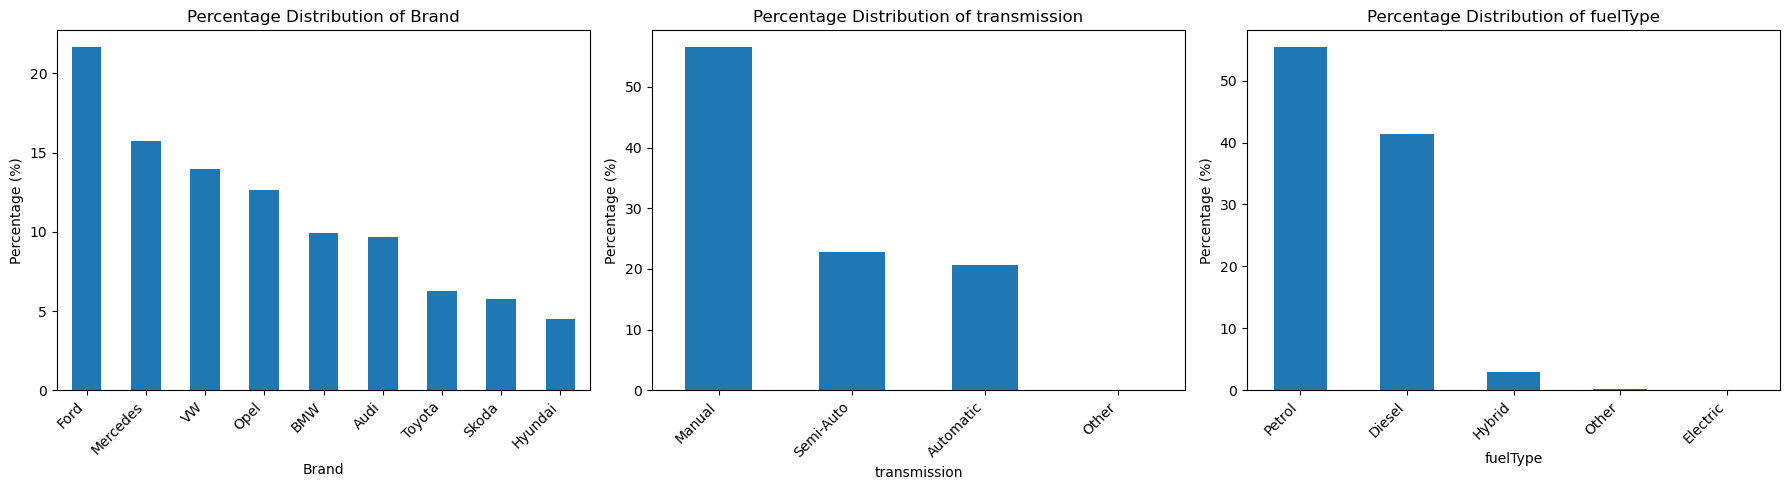

In [40]:
cols = ["Brand", "transmission", "fuelType"]

# Plots
plt.figure(figsize=(18, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    (df_train[col].value_counts(normalize=True) * 100).plot(kind='bar')
    plt.title(f"Percentage Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The categorical distributions reveal several imbalances across features:

- The `Brand` distribution is dominated by a few manufacturers such as `Ford`, `Mercedes`, `VW`, and `Opel`, while many other brands appear with much lower frequency;
- The `transmission` variable is clearly skewed toward `Manual` cars, with `Automatic` and `Semi-Auto` representing smaller portions of the dataset;
- Similarly, the `fuelType` variable has a much higher percentage of `Petrol` and `Diesel` vehicles, whereas `Hybrid`, `Electric` and `Other` fuel types are rare.

To ensure that our categorical data can be effectively used in the regression problem, **One-Hot Encoding** will be applied, creating separate binary indicators for each category. To deal with the feature imbalance, this approach allows the model to treat frequent and rare categories independently, without requiring oversampling or class-balancing techniques.

Number of unique models in the dataset: 189
Models with ≤10 occurrences: count
1     13
2      4
3      5
4      5
5      1
6      3
7      1
8      2
9      2
10     3
Name: count, dtype: int64 (20.63% of all models)



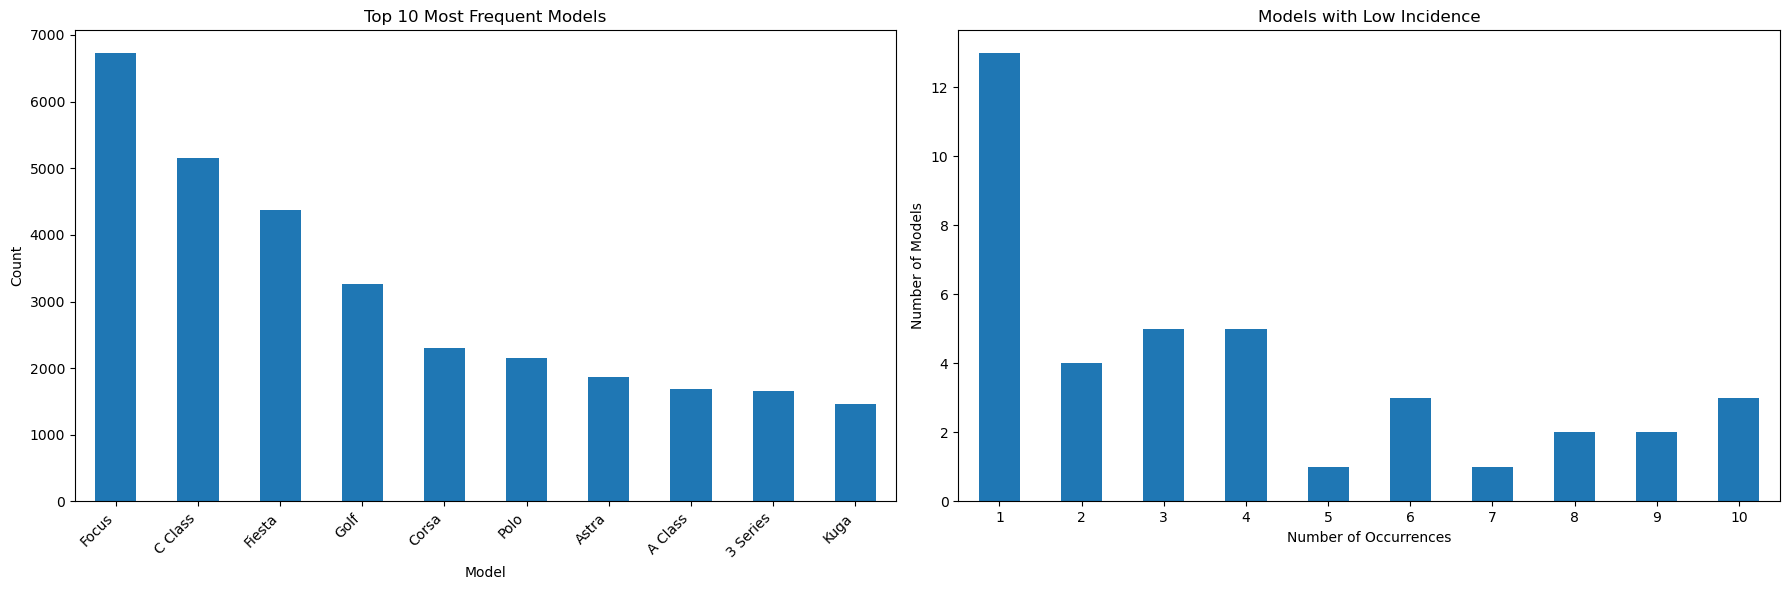

In [41]:
col = "model_clean"

# Top10 most frequent models
top10 = df_train[col].value_counts().head(10)

# Top10 models with low incidence
model_counts = df_train[col].value_counts()
low_incidence_top10 = model_counts.value_counts().sort_index().loc[1:10]

# Number of unique models
num_models = df_train[col].nunique() - 2 # The "UNIDENTIFIED MODEL - BMW" and "UNIDENTIFIED MODEL - AUDI" count here. Need to get them out
print(f"Number of unique models in the dataset: {num_models}")

# Proportion of models that appear 10 times or fewer
count = (model_counts <= 10).sum() # no need to subtract nothing here
proportion = count / num_models

print(f"Models with ≤10 occurrences: {low_incidence_top10} ({proportion:.2%} of all models)\n")

# Plots
plt.figure(figsize=(18, 6))

# Left plot 
plt.subplot(1, 2, 1)
top10.plot(kind='bar')
plt.title("Top 10 Most Frequent Models")
plt.xlabel('Model')
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Right plot
plt.subplot(1, 2, 2)
low_incidence_top10.plot(kind='bar')
plt.title("Models with Low Incidence")
plt.xlabel("Number of Occurrences")
plt.ylabel("Number of Models")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

The first plot reflect the same pattern seen in the `Brand` distribution, with `Ford`, `Mercedes`, `VW`, and `Opel` dominating in both cases . On the other hand, the second plot shows that a considerable proportion of the 191 total models (around 20%) appear 10 times or fewer, revealing a pronounced **long-tail distribution** characteristic of **high-cardinality** categorical features. For this reason, **Target Encoding** is the most appropriate strategy to represent `model_clean`.

<a class="anchor" id="2st-bullet">    </a>
## 4.2 Target Distribution

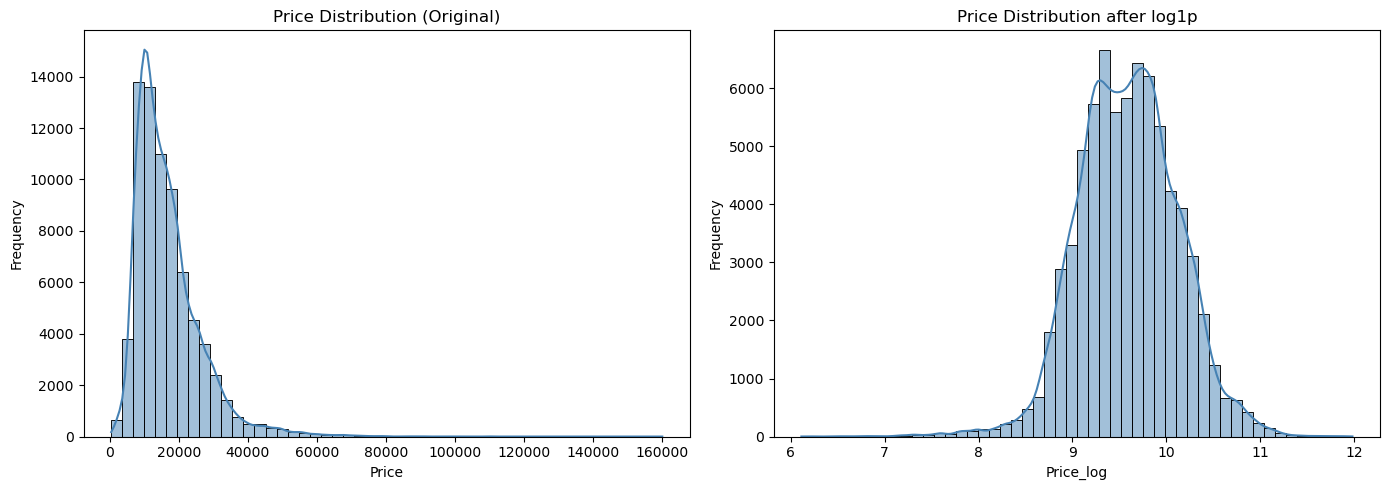

       Original Price     Log Price
count    73908.000000  73908.000000
mean     16860.983236      9.592370
std       9722.521684      0.532571
min        450.000000      6.111467
25%      10199.000000      9.230143
50%      14677.500000      9.594139
75%      20900.000000      9.947552
max     159999.000000     11.982929


In [42]:
# Original prices
prices = df_train['price']

# Log transformation
prices_log = np.log1p(prices)

# Plots
plt.figure(figsize=(14, 5))

# Original price distribution 
plt.subplot(1, 2, 1)
sns.histplot(prices, bins=50, kde=True, color='steelblue')
plt.title("Price Distribution (Original)")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Price after log transformation
plt.subplot(1, 2, 2)
sns.histplot(prices_log, bins=50, kde=True, color='steelblue')
plt.title("Price Distribution after log1p")
plt.xlabel("Price_log")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Descriptions
describe_df = pd.DataFrame({
    "Original Price": prices.describe(),
    "Log Price": prices_log.describe()
})

print(describe_df)


The first plot shows that the original price values are heavily **right-skewed**, with a long tail of expensive cars that increase the variance. In contrast, the `log1p` transformation compresses large values and spreads smaller ones, resulting in a much more balanced and symmetric distribution as seen in the second plot. This transformation makes the target easier to model and reduces the impact of extreme observations.

### Exploring Interactions Between Categorical Features and Price

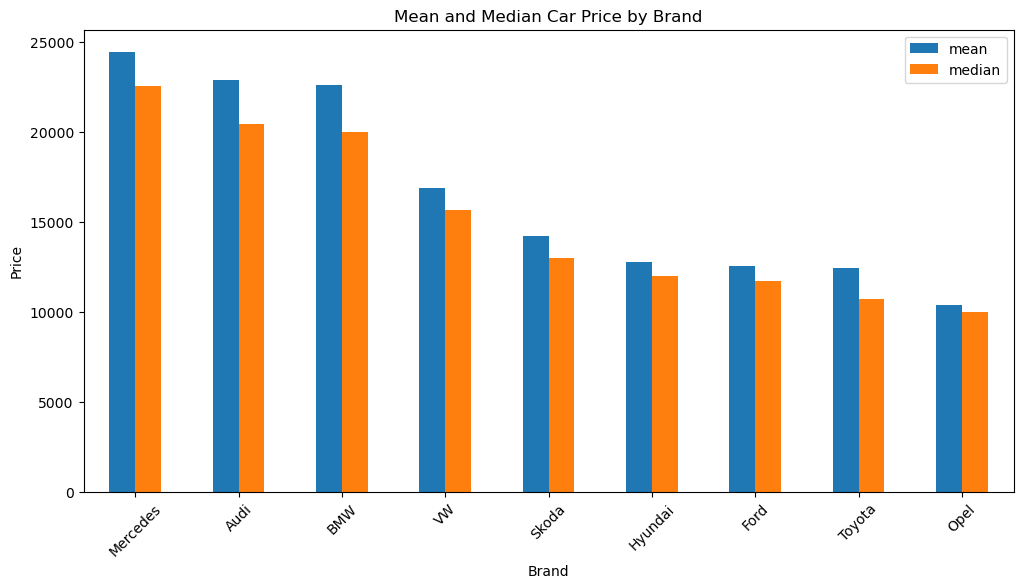

In [43]:
# Data frame with mean and median price per Brand
brand_stats = (df_train.groupby('Brand')['price'].agg(mean='mean', median='median').sort_values('median', ascending=False))

# Plot
brand_stats.plot(kind='bar',figsize=(12, 6))

plt.title("Mean and Median Car Price by Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Looking at barplot we can see that premium brands (`Mercedes`, `Audi`, `BMW`) tend to record high price levels compared with the remaining ones. Although median and mean values lead to tbe exact same ranking, variations in their scores reflect a distinct degree of price dispersion, consequence of the skewed nature of the price distribution. Despite the fact that `Brand` does not explain price differences, it clearly shapes price distribution and should be included in the model feature selection.

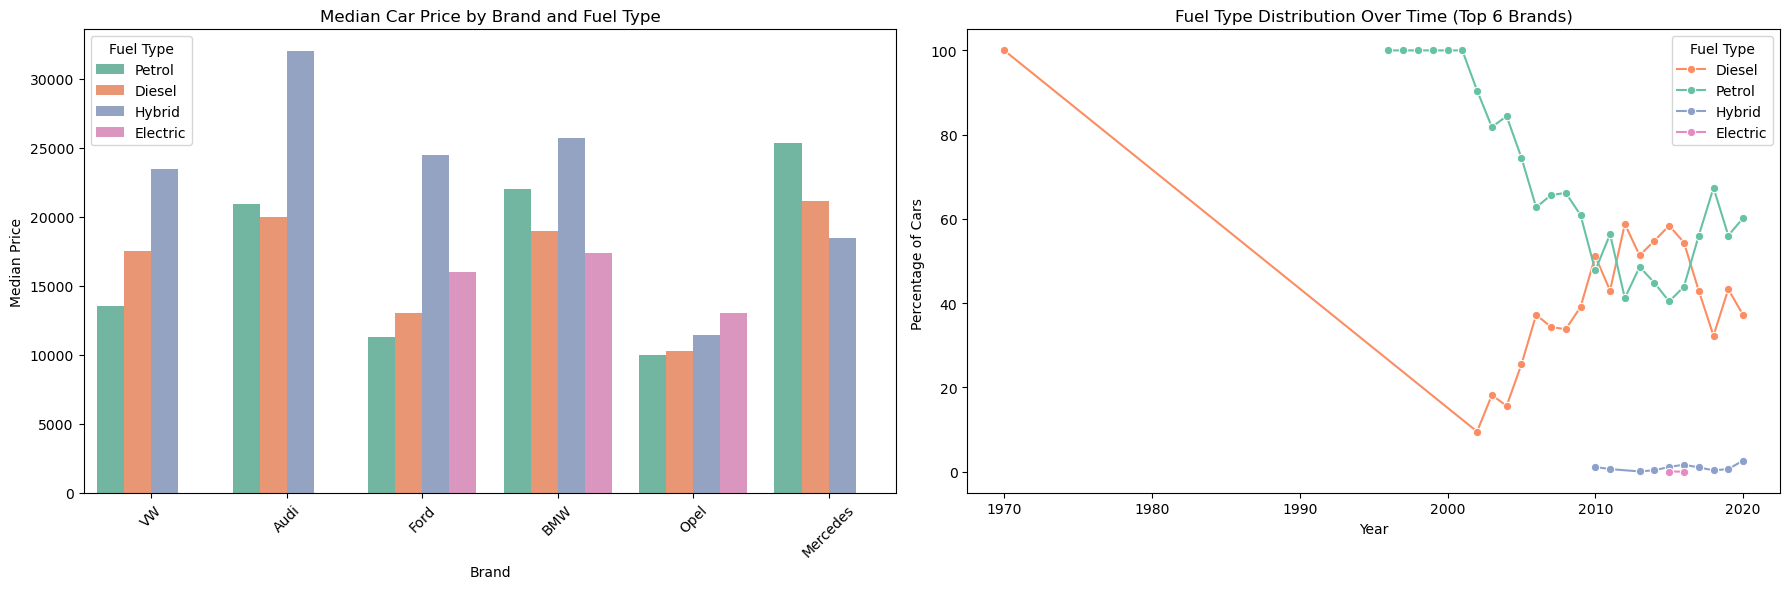

In [44]:
# Get top 6 Brands with the most incidence
top_6_brands = df_train['Brand'].value_counts().head(6).index

# Create a subset with the top 6 most frequent brands and exclude the 'Other'
# category in 'fuelType' to ensure interpretability
df_plot = df_train[(df_train['Brand'].isin(top_6_brands)) & (df_train['fuelType'] != 'Other')].copy()

# Define a fixed color palette so that each fuelType has the same color in all plots
fuel_types = df_plot['fuelType'].value_counts().index.tolist()
fuel_palette = dict(zip(fuel_types, sns.color_palette("Set2", len(fuel_types))))

# Create figure with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot: median car price by Brand and fuelType
sns.barplot(
    data=df_plot,
    x='Brand',
    y='price',
    hue='fuelType',
    estimator=np.median,
    errorbar=None,
    palette=fuel_palette,
    ax=axes[0]
)

axes[0].set_title("Median Car Price by Brand and Fuel Type")
axes[0].set_ylabel("Median Price")
axes[0].set_xlabel("Brand")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Fuel Type")

# Data frame with the total number of occurrences of each fuel type for every year
fuel_year_counts = (df_plot.groupby(['year', 'fuelType']).size().reset_index(name='count'))

# Transform counts into percentage distribution per year
fuel_year_counts['percentage'] = fuel_year_counts['count'] / fuel_year_counts.groupby('year')['count'].transform('sum')* 100
                                  
# Line plot: fuelType distribution over time
sns.lineplot(
    data=fuel_year_counts,
    x='year',
    y='percentage',
    hue='fuelType',
    marker='o',
    palette=fuel_palette,
    ax=axes[1]
)

axes[1].set_title("Fuel Type Distribution Over Time (Top 6 Brands)")
axes[1].set_ylabel("Percentage of Cars ")
axes[1].set_xlabel("Year")
axes[1].legend(title="Fuel Type")

plt.tight_layout()
plt.show()



**Fuel type** is associated with different price levels across brands, but its effect is not uniform. While `Hybrid` vehicles tend to occupy higher price segments for most brands, notable exceptions exist, such as Mercedes, where `Petrol` vehicles dominate the upper price range. This difference could be partly explained by the fact that `Hybrid` vehicles are more prevalent among more **recent** model years (see right plot), which are generally associated with higher prices. Overall, these patterns reflect brand-specific interaction effects between fuel type, vehicle age and price.

To ensure statistical interpretability, the analysis focuses on the **six most frequent brands** in the dataset. Additionaly, the category `Other` was removed from the analysis, since it doesn't add interpertability to the results.

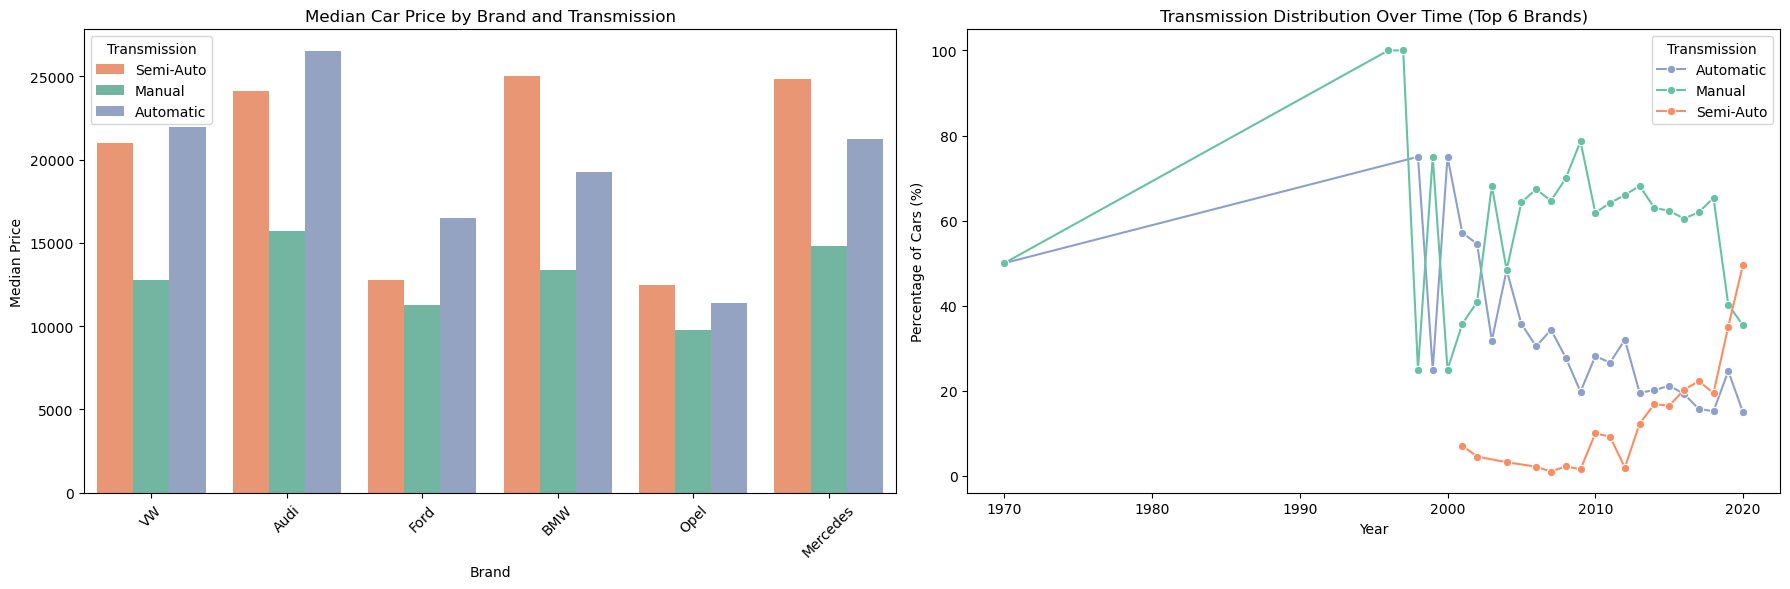

In [45]:
# Create a subset with the top 6 most frequent brands and exclude the 'Other'
# category in 'transmission' to ensure interpretability
df_plot = df_train[(df_train['Brand'].isin(top_6_brands)) & (df_train['transmission'] != 'Other')]

# Define a fixed color palette so that each fuelType has the same color in all plots
transmission_types = df_plot['transmission'].value_counts().index.tolist()
transmission_palette = dict(zip(transmission_types, sns.color_palette("Set2", len(transmission_types))))

# Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BarPlot
sns.barplot(
    data=df_plot,
    x='Brand',
    y='price',
    hue='transmission',
    estimator=np.median,
    errorbar=None,
    palette=transmission_palette,
    ax=axes[0]
)

axes[0].set_title("Median Car Price by Brand and Transmission")
axes[0].set_ylabel("Median Price")
axes[0].set_xlabel("Brand")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Transmission")

# Data frame with the total number of occurrences of each transmission for every year
trans_year_counts = (df_plot.groupby(['year', 'transmission']).size().reset_index(name='count'))

# Transform each count to percentage distribution
trans_year_counts['percentage'] = (
    trans_year_counts['count'] /
    trans_year_counts.groupby('year')['count'].transform('sum')
) * 100

# LinePLot
sns.lineplot(
    data=trans_year_counts,
    x='year',
    y='percentage',
    hue='transmission',
    marker='o',
    palette=transmission_palette,
    ax=axes[1]
)

axes[1].set_title("Transmission Distribution Over Time (Top 6 Brands)")
axes[1].set_ylabel("Percentage of Cars (%)")
axes[1].set_xlabel("Year")
axes[1].legend(title="Transmission")

plt.tight_layout()
plt.show()


Vehicles that are `Automatic` and `Semi-Automatic` are more expensive than those that are `Manual`. While `Semi-Automatic` transmissions are more common in recent cars (particularly after 2010), `Automatic` were most common in earlier periods (before 2010). This indicates that the two transmission types are associated with higher prices for different reasons, rather than reflecting a single temporal pattern.

<a class="anchor" id="2st-bullet">    </a>
## 4.3 Feature Engineering

In [46]:
def create_features(df):
    """
    Performs feature engineering to create new metrics for vehicle analysis.
    """
    df = df.copy()
    
    # Quantifies fuel economy relative to engine displacement
    # This helps identify engines that offer high performance (mpg) for their size
    df['engine_efficiency'] = df['mpg'] / (df['engineSize'] + 0.1) # that 0.1 is to deal with divisions by zero

    # Estimates the average annual usage intensity of the vehicle
    # High values indicate heavy usage while low values indicate light usage
    df['mileage_per_year'] = df['mileage'] / (2020 - df['year']).replace(0, 1)  # Avoid division by zero 

    # This is crucial for pricing models as brand perception significantly affects value
    premium_brands = ['BMW', 'Audi', 'Mercedes']
    df['is_premium_brand'] = df['Brand'].apply(lambda x: 1 if x in premium_brands else 0)

    # Identifies vehicles that are exempt from road tax
    df['is_tax_free'] = (df['tax'] == 0).astype(int)
        
    return df

<a class="anchor" id="2st-bullet">    </a>
## 4.4 Distribution of Numerical Variables and Outlier Analysis

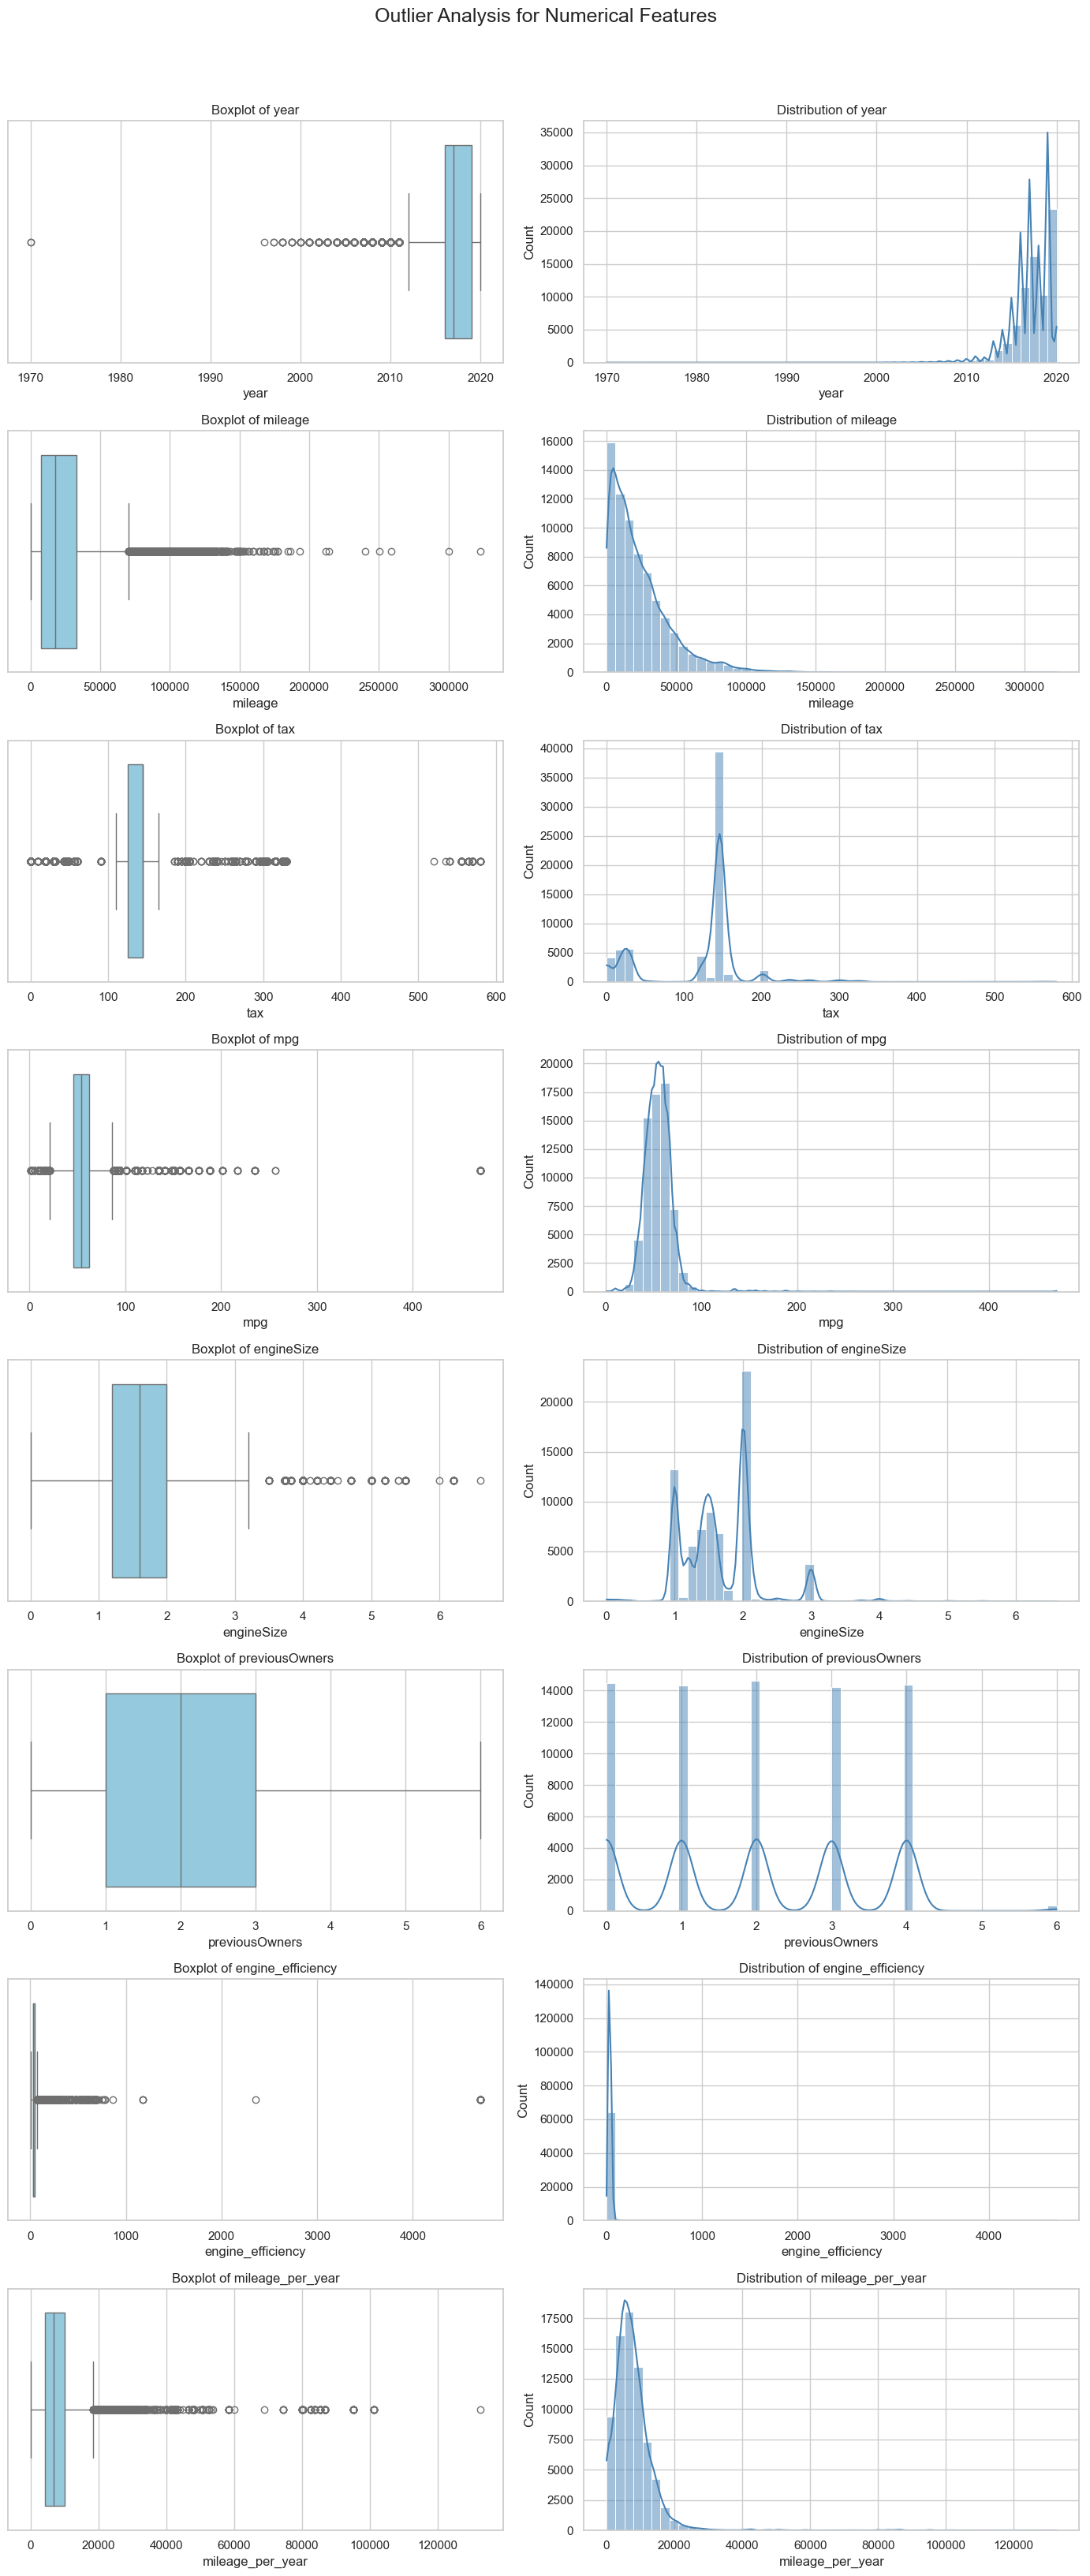

In [47]:
sns.set_theme(style="whitegrid")

# Use the create_features to create a new dataset with the new features created
df_train_EDA = create_features(df_train)

# Select only numerical variables to calculate Spearman correlation coefficient between variables
cols_EDA_numerical = df_train_EDA.select_dtypes(include=['number']).drop(columns=['carID', 'is_premium_brand', 'is_tax_free', 'price']).columns

# Plots
fig, axes = plt.subplots(len(cols_EDA_numerical), 2, figsize=(14, 4 * len(cols_EDA_numerical)))

fig.suptitle("Outlier Analysis for Numerical Features", fontsize=18, y=1.02)

for i, col in enumerate(cols_EDA_numerical):

    # Boxplot
    sns.boxplot(
        data=df_train_EDA,
        x=df_train_EDA[col],
        ax=axes[i, 0],
        color='skyblue'
    )
    axes[i, 0].set_title(f"Boxplot of {col}")
    axes[i, 0].set_xlabel(col)

    # Histogram
    sns.histplot(
        df_train_EDA[col],
        bins=50,
        kde=True,
        ax=axes[i, 1],
        color='steelblue'
    )
    axes[i, 1].set_title(f"Distribution of {col}")
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()


#### **1. Year**
Distribution: Heavily left-skewed (negative skew). The vast majority of the dataset consists of modern vehicles (2015–2020).

Outliers: There are distinct outliers dating back to 1970.

The model will be biased towards recent cars. The vintage cars (pre-2000) likely follow a different pricing logic (collector value) compared to the depreciation curve of modern cars.

#### **2. Mileage**
Right-skewed, mirroring the year distribution (older cars $\approx$ higher mileage).

Outliers: There are vehicles with nearly 300,000 miles.

#### **3. Tax**
Distribution: Multimodal/Discrete. It does not follow a bell curve; instead, it shows sharp peaks.

Key Peaks:

0: Represents tax-exempt vehicles (likely low-emission or electric).

~150: Represents the standard tax rate for combustion vehicles.

#### **4. Mpg**
Outliers: While the main distribution centers around 50–60 mpg, there are extreme outliers exceeding 400 mpg.

We must cap or filter these values (mpg < 100 or similar). Leaving values of 400+ will severely distort any model, making these specific cars appear unrealisticly efficient.

#### **5. engineSize**
Distribution: Discrete peaks corresponding to standard engine sizes (1.0L, 1.5L, 2.0L, 3.0L).

Outliers:

0: Likely Electric Vehicles (EVs) or missing data.

High values: 5.0L+ indicate performance/luxury.

#### **6. previousOwners**
Distribution: Categorical behavior.

Pattern: The vast majority of cars have 1 or 2 owners. Cars with 4+ owners are negligible.

#### **7. engine_efficiency** 
This plot highlights why feature engineering requires clean data first.

Because mpg has outliers (400+), and engineSize can be small (or near 0), the ratio calculation explodes.

The histogram shows a single spike near 0 and invisible outliers at 4000.

This feature is currently useless because it amplifies the noise from the mpg variable. Once mpg is cleaned, this feature will show a proper distribution.

<a class="anchor" id="2st-bullet">    </a>
## 4.5 Correlation Analysis

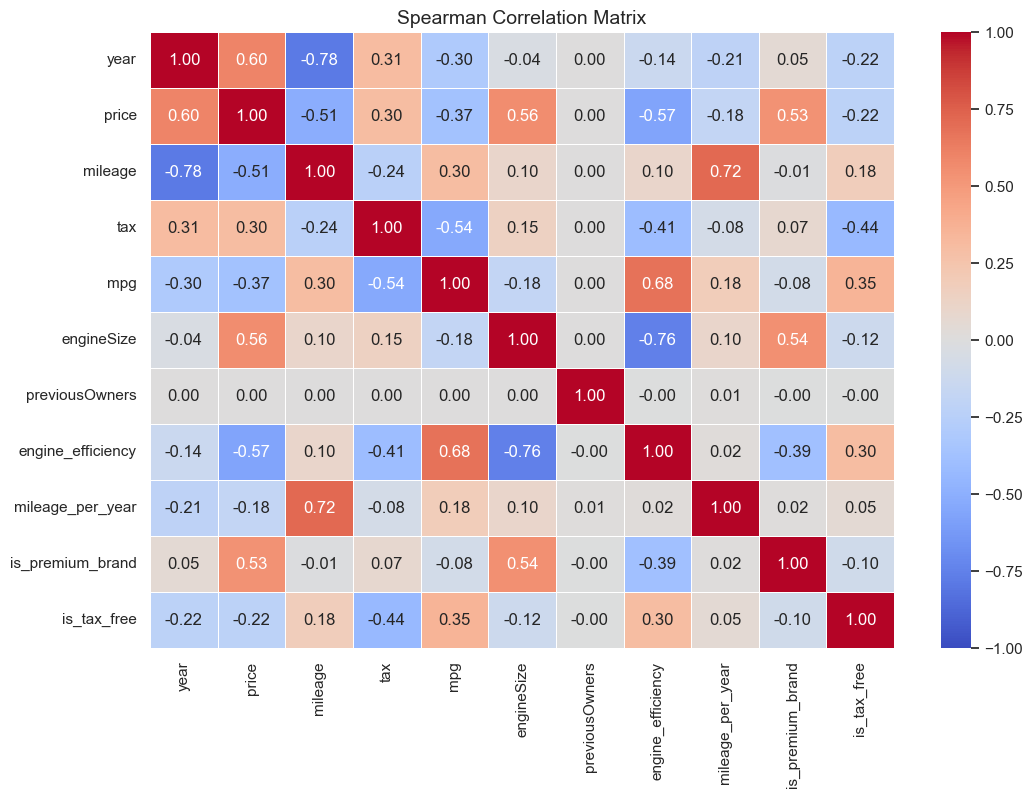

In [48]:
# Select only numerical variables to calculate Spearman correlation coefficient between variables
cols_numerical = df_train_EDA.select_dtypes(include=['number']).drop(columns=['carID']).columns
df_correlation = df_train_EDA[cols_numerical]

# Simple imputation since Spearman correlation coefficient calculation can't deal with NaN's
df_correlation = df_correlation.fillna(df_correlation.median())

# Correlation Matrix Coefficients
matriz_corr = df_correlation.corr(method='spearman')

# Heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(
    matriz_corr, 
    annot=True,       
    fmt=".2f",        
    cmap='coolwarm',  
    vmin=-1, vmax=1,  
    linewidths=0.5
)

plt.title('Spearman Correlation Matrix', fontsize=14)
plt.show()

#### Strong Positive Correlations:

**year** (0.60): The strongest predictor. Newer cars are significantly more expensive.

**engineSize** (0.56): Larger engines correlate with higher prices. This reflects the market reality that sports cars and luxury SUVs (large engines) cost more than city cars.

**is_premium_brand** (0.54): Feature engineered feature is working well. Being a BMW, Audi, or Mercedes is a strong indicator of a higher price tag.

#### Strong Negative Correlations:

**engine_efficiency** (-0.57): This engineered feature has a stronger correlation with price than raw mpg (-0.37). This suggests that efficient cars (small engines, high MPG) are generally cheaper economy vehicles, while inefficient cars (large engines, lower MPG) are expensive performance vehicles.

**mileage** (-0.51): As expected, higher mileage significantly devalues a car.

#### Multicollinearity (Redundant Information)
We have some variables that are strongly correlated with each other and while tree-based models (like Random Forest) handle it well, linear models might struggle.

**year vs mileage (-0.78)**: This is the strongest correlation in the matrix. Newer cars naturally have lower mileage. We might not need both if we are using a simple linear model, but usually, it's safe to keep both.

**engineSize vs engine_efficiency (-0.76)**: These are heavily inversely related. Larger engines generally consume more fuel (lower mpg). So, as engineSize goes up, the mpg usually goes down.

<a class="anchor" id="2st-bullet">    </a>
# 5. Modelling Preprocessing

<a class="anchor" id="2st-bullet">    </a>
## 5.1 Imputation 

In [49]:
def get_grouped_stats(df, group_cols, target_col, stat, min_count):
    """
    Computes a grouped statistic (median or mode) and filters out groups with fewer than 'min_count' observations.
    Returns a dictionary {group_key: value}.
    """
    
    # Group target variable by specified columns
    grouped = df.groupby(group_cols)[target_col]
    
    # Count observations per group
    counts = grouped.count()
    
    # Compute statistic 
    if stat == 'mode':
        stats = grouped.apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    else:
        # Apply median
        stats = grouped.agg(stat) # stat == 'median'
    
    # 2. Keep only groups with sufficient sample size
    valid_groups = stats.index.intersection(counts[counts >= min_count].index)
    
    # Return results as a dictionary
    return stats.loc[valid_groups].to_dict()

#### Group-Based Imputation

Missing values are imputed using group-level statistics in order to preserve structural patterns across similar vehicles. Instead of relying on global aggregates, imputations are computed conditionally on predefined grouping variables.

For each group, the median (for continuous features) or the mode (for categorical features) is calculated. To ensure statistical robustness, only groups with a minimum number of observations (min_count) are retained, preventing unreliable imputations from sparse groups.

The resulting statistics are stored as a lookup dictionary and applied consistently during training, validation, and deployment, ensuring a leakage-free and reproducible imputation process.

In [ ]:
def rules_imputation(df_train):
    """
    Learn all imputation statistics from the training data. All rules are stored in a dictionary and reused consistently later.
    """
    
    # Dictionary to store all imputation rules
    rules = {}
    
    # NUMERICAL VARIABLES - Median

    # 1. Global Median
    rules['global_owners'] = df_train['previousOwners'].median() # this one doesn't depend on the caractheristics of the car. Always global median
    rules['global_engine'] = df_train['engineSize'].median() # sobram 27 não sei porquê
    rules['global_tax'] = df_train['tax'].median()
    rules['global_mpg'] = df_train['mpg'].median()
    
    # 2. Get rules by Brand 
    # Brand-level median is used as a robust fallback due to sufficient sample size
    rules['engine_per_brand'] = df_train.groupby('Brand')['engineSize'].median().to_dict()
    rules['tax_per_brand'] = df_train.groupby('Brand')['tax'].median().to_dict()
    rules['mpg_per_brand'] = df_train.groupby('Brand')['mpg'].median().to_dict()
    rules['year_per_brand'] = df_train.groupby('Brand')['year'].median().to_dict() # this one doesn´t necessarily depend on other features
    rules['mileage_per_brand'] = df_train.groupby('Brand')['mileage'].median().to_dict()

    # 3. Most informative rules using multiple variables
    
    # Engine size depends on Brand and Model
    rules['engine_per_brand_model'] = get_grouped_stats(df_train, ['Brand', 'model_clean'], 'engineSize', stat='median', min_count=10)
    
    # Mileage depends mainly on vehicle age 
    rules['mileage_per_year'] = get_grouped_stats(df_train, ['year'], 'mileage', stat='median', min_count=10)
    
    # MPG imputation based on Brand and Model due to lack of significant correlations with other numerical features
    rules['mpg_per_brand_model'] = get_grouped_stats(df_train, ['Brand', 'model_clean'], 'mpg', stat='median', min_count=10)

    # Tax depends on Brand and Model - same criterium mentioned before
    rules['tax_per_brand_model'] = get_grouped_stats(df_train, ['Brand', 'model_clean'], 'tax', stat='median', min_count=10)
    

    # CATEGORICAL VARIABLES - Mode
    
    for col in ['transmission', 'fuelType', 'model_clean']:
        if col != 'model_clean':
            
            # 1. Global Fallback
            rules[f'{col}_global'] = df_train[col].mode()[0]
            
            # 2. Get rules by Brand
            rules[f'{col}_per_brand'] = df_train.groupby('Brand')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
            
            # 3. Get rules by Brand and Model
            rules[f'{col}_per_model'] = get_grouped_stats(df_train, ['Brand', 'model_clean'], col, stat='mode', min_count=10)
        else:
            # 1. Global Fallback
            rules[f'{col}_global'] = df_train[col].mode()[0]
            
            # 2. Get rules by Brand
            rules[f'{col}_per_brand'] = df_train.groupby('Brand')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
    return rules

#### Imputation Rules Learning

All imputation rules are learned exclusively from the training data and stored in a single dictionary to ensure consistency and prevent data leakage. This dictionary is later reused unchanged during validation and deployment.

For numerical variables, median-based rules are defined at multiple levels of granularity:

- Global medians are used for variables that do not strongly depend on vehicle characteristics.

- Brand-level medians act as a robust fallback, as they always have sufficient data.

- More informative rules are learned using combinations of variables (e.g. Brand + Model or Year), and are only retained when enough observations are available.

For categorical variables, imputation is performed using the mode, following the same hierarchical logic: global fallback, brand-level rules, and brand–model rules when statistically reliable.

By learning all rules once from the training set and reusing them consistently, this approach guarantees a deterministic, leakage-free, and reproducible imputation pipeline.

In [92]:
def apply_imputation_rules(df, rules):
    """
    To apply imputation we use an hierarchical strategy:
        - For most numerical variables and categorical variables always try to get specific information -> same Brand + Model
        - If there are no sufficient data we use only information relative to the same Brand
        - If that's also not the case we use information from the whole column -> global fallback
    """
    df_imputed = df.copy()
    

    # 1. Numerical Variables
    
    # Does not strongly depend on vehicle characteristics → global median
    if 'previousOwners' in df_imputed.columns:
        df_imputed['previousOwners'] = df_imputed['previousOwners'].fillna(rules.get('global_owners', 0))

    
    # Primarily explained by vehicle age, with Brand as fallback
    if 'mileage' in df_imputed.columns:
        map_year = df_imputed['year'].map(rules.get('mileage_per_year', {}))
        map_brand = df_imputed['Brand'].map(rules.get('mileage_per_brand', {}))
        
        df_imputed['mileage'] = df_imputed['mileage'].fillna(map_year).fillna(map_brand) # that's the imputation

        
    # We handle "engineSize" separately
    if 'engineSize' in df_imputed.columns:
        if 'model_clean' in df_imputed.columns:
            combo_key = pd.Series(list(zip(df_imputed['Brand'], df_imputed['model_clean'])), index=df_imputed.index)
            val_specific = combo_key.map(rules.get('engine_per_brand_model', {})) # Brand + Model
        else:
            val_specific = np.nan
        
        val_brand = df_imputed['Brand'].map(rules.get('engine_per_brand', {})) # Brand
        
        val_global = rules.get('global_engine', 0) # Global fallback
        
        df_imputed['engineSize'] = df_imputed['engineSize'].fillna(val_specific).fillna(val_brand).fillna(val_global) # that's the imputation


    
    numerical_left_cols = {'mpg': 'mpg_per_brand_model', 'tax': 'tax_per_brand_model'}
    
    if 'model_clean' in df_imputed.columns:
        combo_key = pd.Series(list(zip(df_imputed['Brand'], df_imputed['model_clean'])), index=df_imputed.index)

        for col, rule_name in numerical_left_cols.items():
            if col in df_imputed.columns:
                val_specific = combo_key.map(rules.get(rule_name, {}))
                
                val_brand = df_imputed['Brand'].map(rules.get(f'{col}_per_brand', {}))
                
                val_global = rules.get(f'global_{col}', 0) # Global fallback
                
                
                df_imputed[col] = df_imputed[col].fillna(val_specific).fillna(val_brand).fillna(val_global)
    
    # The same model is typically sold across multiple years -> so Brand fallback
    if 'year' in df_imputed.columns:
         map_brand = df_imputed['Brand'].map(rules.get('year_per_brand', {}))
         df_imputed['year'] = df_imputed['year'].fillna(map_brand)


    # Categorical Variables - Mode
    cat_cols = ['transmission', 'fuelType', 'model_clean']
    
    for col in cat_cols:
        if col in df_imputed.columns:
            val_global = rules.get(f'{col}_global', 'Unknown')
            val_brand = df_imputed['Brand'].map(rules.get(f'{col}_per_brand', {}))
            
            if col == 'model_clean':
                df_imputed[col] = df_imputed[col].fillna(val_brand).fillna(val_global)
            else:
                if 'model_clean' in df_imputed.columns:
                     combo_key = pd.Series(list(zip(df_imputed['Brand'], df_imputed['model_clean'])), index=df_imputed.index)
                     val_model = combo_key.map(rules.get(f'{col}_per_model', {}))
                     df_imputed[col] = df_imputed[col].fillna(val_model).fillna(val_brand).fillna(val_global)
                else:
                     df_imputed[col] = df_imputed[col].fillna(val_brand).fillna(val_global)

    return df_imputed

#### Imputation Rules Application

Imputation is applied using a hierarchical, rule-based cascade learned from the training data. For each feature, missing values are filled by progressively more general rules, moving from specific vehicle characteristics to global fallbacks when necessary.

For numerical variables, the imputation follows a structured order. Mileage and engine-related features prioritise rules based on Brand and Model, followed by Brand-level statistics, and finally global medians to guarantee full coverage. The engineSize variable is handled separately to ensure that all remaining missing cases are fully resolved.

For categorical variables, missing values are imputed using the mode, following the same hierarchical logic: Brand–Model rules when available, Brand-level fallbacks, and a global default as a last resort.

This cascading strategy ensures that imputations remain informative, robust, and leakage-free, while guaranteeing that no missing values remain in the final dataset.

<a class="anchor" id="2st-bullet">    </a>
## 5.2 Outliers Handling 

In [52]:
def get_outliers_iqr(df, cols=['mpg', 'tax', 'mileage'], factor=3.0):
    caps = {}
    for col in cols:
        if col in df.columns:
            # Compute IQR
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            
            # Define upper cap
            caps[col] = q3 + factor * iqr
    return caps


def apply_capping(df, caps):
    df_out = df.copy()
    for col, limit in caps.items():
        if col in df_out.columns:
            # Cap extreme values without trimming tails
            df_out[col] = df_out[col].clip(upper=limit)
    return df_out


To deal with outliers, as seen in the boxplots presented in EDA, IQR method is used to cap extreme values but with a `factor = 3.0` to be more conservative and avoiding removing too many rows.

<a class="anchor" id="2st-bullet">    </a>
## 5.3 One-Hot Encoding

In [53]:
def get_one_hot_encodings(df_train, cols):
    """
    Learn fixed One-Hot Encoding rules from the training dataset.
    """
    
    # Initialize dictionary to store encoding rules
    rules = {}
    
    # Iterate over selected categorical columns
    for col in cols:
        if col in df_train.columns:           
            # Extract unique categories from training data
            unique_vals = sorted(df_train[col].astype(str).unique().tolist())
                
            # Store allowed categories for this column
            rules[col] = unique_vals
        
    return rules


def apply_one_hot_encodings(df, rules):
    """
    Apply One-Hot Encoding using fixed rules learned from training data.
    """
    
    # Create a copy to avoid changing the original dataframe
    df_out = df.copy()
    
    # Iterate over each column and its learned categories
    for col, categories in rules.items():
        if col in df_out.columns:
            # Create one binary column per learned category
            for cat in categories:
                    
                # Define the new one-hot column name
                new_col_name = f"{col}_{cat}"
                    
                # Create binary indicator (1 if category matches, 0 otherwise)
                df_out[new_col_name] = (df_out[col].astype(str) == cat).astype(int)
                
            # Drop the original categorical column
            df_out = df_out.drop(columns=[col])
            
    return df_out


To ensure that categorical variables can be effectively used in the regression problem, **One-Hot Encoding** is applied, creating separate binary indicators for each category. This representation allows the model to treat each category independently, avoiding artificial ordering or averaging effects that could arise from alternative encodings.

In the **modeling pipeline**, these encoding rules are learned **inside each training fold** and reapplied to the corresponding validation set, while in deployment they are learned on the full training data and applied once to the test set. This ensures consistency with the benchmarking setup and prevents information leakage. 

<a class="anchor" id="2st-bullet">    </a>
## 5.4 Target Encoding

In [54]:
def get_target_encodings(X_train, y_train, cols, smoothing=10):
    """
    Learn target encoding mappings using training data only -> used for "model_clean"
    """
    
    # Initialize dictionary to store encoding rules
    rules = {}
    
    # Compute global target mean
    global_mean = y_train.mean()
    rules['global_mean'] = global_mean
    rules['maps'] = {}
    
    # Temporarily merge features and target for group-based aggregation
    temp_df = X_train.copy()
    temp_df['target'] = y_train
    
    # Iterare over columns
    for col in cols:
        
        # Compute count and mean target per category
        agg = temp_df.groupby(col)['target'].agg(['count', 'mean'])
        counts = agg['count']
        means = agg['mean']
        
        # Apply smoothing to reduce noise in rare categories (low count or extreme mean price)
        smooth = (counts * means + smoothing * global_mean) / (counts + smoothing)
        
        # Store category-to-value mapping
        rules['maps'][col] = smooth.to_dict()
        
    return rules


def apply_target_encodings(df, rules):
    
    # Create a copy to avoid changing the original dataframe
    df_out = df.copy()
    
    global_mean = rules['global_mean']
    
    # Apply target encoding column by column
    for col, mapping in rules['maps'].items():
        if col in df_out.columns:
            # Map categories to encoded values
            df_out[col] = df_out[col].map(mapping).fillna(global_mean) # fallback: fill NaN with global_mean
            
    return df_out

**Target Encoding** is applied to high-cardinality categorical variables (such as `model_clean`) by replacing each category with the **average target value** observed in the training data. This allows us to capture price differences across models without introducing a large number of sparse features, as would happen with One-Hot Encoding.

To avoid overfitting and unreliable estimates for rare categories, a **smoothing strategy** is used. This smoothing step prevents models with very few examples from having an exaggerated influence on the predictions by keeping their encoded values closer to the overall average price.

In the modeling pipeline, target encoding mappings are **learned exclusively on the training split of each fold** and then applied to the corresponding validation data. During deployment, the mappings are learned on the full training dataset and applied once to the test set.  


<a class="anchor" id="2st-bullet">    </a>
## 5.5 Feature Selection 

In [55]:
def feature_selection_voting(X_train, y_train):
    """
    Perform feature selection using a voting scheme between Mutual Information and Random Forest feature importance.
    """
    
    # Detect feature types
    discrete_mask = [X_train[col].nunique() <= 2 for col in X_train.columns] # considered as a discrete feature if has 2 or less different values (e.g Brand)
    
    print("Features type:")
    print(f"Discrete Features (after One-Hot Encoding): {sum(discrete_mask)}")
    print(f"Continuous Features (numerical features): {len(discrete_mask) - sum(discrete_mask)}") # the rest of features are continuous


    # 1. Mutual Information
    mi_scores = mutual_info_regression(X_train, y_train, discrete_features=discrete_mask, random_state=42)
    
    # Convert MI scores to a sorted Series
    mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)
    

    # 2. Random Forest Feature Importance
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    # Convert RF scores to a sorted Series 
    rf_series = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    

    # Display top 10 features from both methods
    print("\n Ranking Mutual Information (Top 10)")
    print(mi_series.head(10))
    
    print("\n Ranking Random Forest (Top 10)")
    print(rf_series.head(10))
    
    return mi_series, rf_series


def select_best_features(rank_mi, rank_rf, top_n = 10):
    """
    Combine both rankings to select final features.
    Strategy: keep features that appear in the Top N of at least one method.
    """
    
    # Select Top N features from Mutual Information
    top_mi = rank_mi.head(top_n).index.tolist()
    
    # Select Top N features from Random Forest
    top_rf = rank_rf.head(top_n).index.tolist()
    
    # Union of both lists 
    best_features = list(set(top_mi + top_rf))
    
    # Output display
    print(f"\nFinal Features: {best_features}")
    
    return best_features


def remove_multicollinearity(X_train, best_features, threshold=0.85):
    """
    Remove highly correlated features to reduce redundancy.
    If two features have high correlation keep only one.
    """
    
    # Training data to selected features
    df_sel = X_train[best_features]
    
    # Compute absolute correlation matrix
    corr_matrix = df_sel.corr().abs()
    
    # Extract upper triangle of the correlation matrix (A^T = A)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify features to drop based on correlation threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Remove highly correlated features
    final_features = [f for f in best_features if f not in to_drop]
    
    # Check which features were removed
    print(f"\nFeaures removed after multicollinearity analysis: {to_drop}")
    
    return final_features


Feature selection is performed using a **voting strategy** that combines two methods: **Mutual Information** and **Random Forest** feature importance. This allows us to identify features that are either strongly associated with the target or highly useful for prediction in non-linear settings.

- Random Forest Feature Importance: measures the average decrease in impurity or prediction error attributed to splits on each feature across all trees in the ensemble;
- Mutual Information: measures how strongly a feature and the target vary together, based on their joint behavior in the data.


Within **each training fold**, features are ranked independently by both methods, and the final selection consists of the **union** of the **top N features** from each ranking (there is no score threshold for each method, we just choose manually the number of features). This prevents discarding variables that are informative under only one perspective.

After feature selection, we **check for multicollinearity** and remove redundant features. Highly correlated variables (above a predefined threshold defined for each algorithm) are filtered so that only one representative feature is kept. This step is particularly important for models sensitive to correlated inputs -> Linear Regression, KNN

In **deployment**, feature rankings are computed once again using the full training data, and the final feature set is selected following the same voting and multicollinearity rules defined during benchmarking.

<a class="anchor" id="2st-bullet">    </a>
## 5.6 Scaling

Feature scaling is applied to ensure that variables measured on different scales contribute appropriately to the model. In this case, scaling is performed using the **RobustScaler**, which centers the data using the median and scales it according to the interquartile range (IQR). This choice makes the scaling procedure **robust to outliers**, which are present as we saw in numerical variables.

The scaler is always **fitted on the training data only** and then applied to validation and test sets, ensuring consistency with the benchmarking and deployment pipelines.


<a class="anchor" id="2st-bullet">    </a>
# 6. Model Assessment

<a class="anchor" id="2st-bullet">    </a>
## 6.1 Models Configuration

In [ ]:
def get_models_config():
   
    models = {
     'LinearRegression': {
         'model': Ridge(random_state=42), # We use Ridge but we could use Lasso or ElasticNet, there is no criterium
         'params': {
             'alpha': np.logspace(-3, 3, 20)  # Generate alpha values between 0.001 and 1000
         }
     },
    
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [15, 20, 25],
            'weights': ['uniform'],
            'p': [1, 2]
        }
    },
    
     'RandomForest': {
         'model': RandomForestRegressor(random_state=42, n_jobs=-1),
         'params': {
             'n_estimators': [200, 300],
             'max_depth': [5, 10, 20, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [10, 15, 20]}},
        
     'ExtraTrees': {
         'model': ExtraTreesRegressor(random_state=42, n_jobs=-1),
         'params': {
             'n_estimators': [100, 200],
             'max_depth': [10, 20, None],
             'min_samples_leaf': [2, 5]
         }
     },
    
     'GradientBoosting': {
         'model': GradientBoostingRegressor(random_state=42),
         'params': {
             'n_estimators': [100, 200],
             'learning_rate': [0.05, 0.1],
             'max_depth': [3, 5]
         }
     }
}

    return models

Dictionary with all models that were covered in class with different hiperparameters to test during model evaluation (Random Forest, Extra Trees, Gradient Boosting were not directly used in the pratical classes, but they are still decision tree's regression algorithms)

<a class="anchor" id="2st-bullet">    </a>
## 6.2 Benchmarking

In [57]:
def benchmarking(df_train, target_col='price', n_folds=5, top_n=10):
    
    # Models configurations -> use the function defined before
    models_config = get_models_config()
    
    # Separate features and target
    X_full = df_train.drop(columns=['model','carID', target_col], errors='ignore')
    y_full = df_train[target_col]
    
    # K-fold cross-validation 
    kf = KFold(n_splits = n_folds, shuffle = True, random_state=42) # shuffle = True to randomize data split
    
    global_results = []
    
    # Iterate over all models
    for model_name, config in models_config.items():
        
        print(f" Evaluating: {model_name}") # just to be sure which model we are using
        
        # Store metric for model performance analysis
        fold_metrics = {
            'mae_train': [], 'mae_val': [],
            'rmse_train': [], 'rmse_val': [],
            'r2_train': [], 'r2_val': [],
            'gap_pct': [], 'overfitting_score': []
        }
        
        # Cross-validation loop
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_full, y_full)):
            
            # Train and validation split
            X_train, X_val = X_full.iloc[train_idx].copy(), X_full.iloc[val_idx].copy()
            y_train, y_val = y_full.iloc[train_idx].copy(), y_full.iloc[val_idx].copy()
            
            # Log transformation on target variable
            y_train_log = np.log1p(y_train)
            
            # Imputation 
            regras_imp = rules_imputation(X_train)
            X_train = apply_imputation_rules(X_train, regras_imp)
            X_val = apply_imputation_rules(X_val, regras_imp)

            # Outliers Handling
            caps = get_outliers_iqr(X_train, cols=['mpg', 'tax', 'mileage'], factor=3.0)
            X_train = apply_capping(X_train, caps)
            X_val = apply_capping(X_val, caps)

            # Feature Engineering
            X_train = create_features(X_train)
            X_val = create_features(X_val)
            
            # Target Encoding (model_clean only)
            regras_te = get_target_encodings(X_train, y_train, cols=['model_clean'], smoothing=10)
            X_train = apply_target_encodings(X_train, regras_te)
            X_val = apply_target_encodings(X_val, regras_te)
            
            # One-Hot Encoding 
            regras_ohe = get_one_hot_encodings(X_train, ['Brand', 'fuelType', 'transmission'])
            X_train = apply_one_hot_encodings(X_train, regras_ohe)
            X_val = apply_one_hot_encodings(X_val, regras_ohe)
            
            # print(X_train.isna().sum())
            
            # Feature selection and multicollinearity removal
            rank_mi, rank_rf = feature_selection_voting(X_train, y_train_log)
            cols_fold = select_best_features(rank_mi, rank_rf, top_n=top_n)
            
            if model_name in ['LinearRegression', 'KNN']:
                cols_fold = remove_multicollinearity(X_train, cols_fold, threshold=0.85) # they are pretty sensitive to multicollinearity
            else:
                cols_fold = remove_multicollinearity(X_train, cols_fold, threshold=0.95) # not so much in this case, be more rigid
            
            # Keep selected features only
            X_train = X_train[cols_fold]
            X_val = X_val[cols_fold]
            
            # Scaling
            scaler = RobustScaler()
            X_train_s = scaler.fit_transform(X_train)
            X_val_s = scaler.transform(X_val)
            
            # Hyperparameter tuning with GridSearch -> optimizing MAE
            model = config['model']
            gs = GridSearchCV(model, config['params'], cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
            gs.fit(X_train_s, y_train_log)

            
            # Predictions (log-scale → original scale)
            train_preds_log = gs.best_estimator_.predict(X_train_s)
            val_preds_log = gs.best_estimator_.predict(X_val_s)
            
            train_preds = np.expm1(train_preds_log)
            val_preds = np.expm1(val_preds_log)

            
            # Performance metrics
            mae_train = mean_absolute_error(y_train, train_preds)
            mae_val = mean_absolute_error(y_val, val_preds)
            rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
            rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
            r2_train = r2_score(y_train, train_preds)
            r2_val = r2_score(y_val, val_preds)

            # Overfitting diagnostics
            mae_gap = mae_val - mae_train
            mae_gap_percent = (mae_gap / (mae_train)) * 100
            r2_gap = r2_train - r2_val
            
            overfitting_score = 0
            
            if mae_gap_percent > 10:
                overfitting_score += 0.1
            
            if r2_gap > 0.10:
                overfitting_score += 0.01
            
            if r2_train > 0.98:
                overfitting_score += 0.001
            # kinda stupid, but then we know (if it's overfitting) WHY it is overfitting
            
            # Store fold metrics
            fold_metrics['mae_train'].append(mae_train)
            fold_metrics['mae_val'].append(mae_val)
            fold_metrics['rmse_train'].append(rmse_train)
            fold_metrics['rmse_val'].append(rmse_val)
            fold_metrics['r2_train'].append(r2_train)
            fold_metrics['r2_val'].append(r2_val)
            fold_metrics['gap_pct'].append(mae_gap_percent)
            fold_metrics['overfitting_score'].append(overfitting_score)

        
        # Aggregate cross-validation results
        avg_mae_train = np.mean(fold_metrics['mae_train'])
        avg_mae_val = np.mean(fold_metrics['mae_val'])
        avg_rmse_val = np.mean(fold_metrics['rmse_val'])
        avg_r2_val = np.mean(fold_metrics['r2_val'])
        avg_gap = np.mean(fold_metrics['gap_pct'])
        total_overfitting_score = sum(fold_metrics['overfitting_score'])
        
        print(f"\n\nSUMMARY ({n_folds} folds) for Train:")
        print(
            f"MAE: {avg_mae_train:.2f} | "
            f"RMSE: {np.mean(fold_metrics['rmse_train']):.2f} | "
            f"R²: {np.mean(fold_metrics['r2_train']):.4f}"
        )
        print(f"\nSUMMARY ({n_folds} folds) for Validation:")
        print(
            f"MAE: {avg_mae_val:.2f} | "
            f"RMSE: {avg_rmse_val:.2f} | "
            f"R²: {avg_r2_val:.4f}"
        )
        print(f"  \nGap between Train and Val MAE-> {avg_gap:.1f}% (average)")
        
        print(f"\nOVERFITTING DIAGNOSTIC: {total_overfitting_score} issues")
        
        global_results.append({
            'Model': model_name,
            'Val MAE': avg_mae_val,
            'Val RMSE': avg_rmse_val,
            'Val R2': avg_r2_val,
            'Gap %': avg_gap,
            'Overfitting?': 'Maybe' if total_overfitting_score >= 0 else 'Don`t think so',
            'Best_Params': gs.best_params_
        })
    
    # Final comparison table
    df_final = pd.DataFrame(global_results).sort_values(by='Val MAE')
    return df_final

For model assessment we use the **k-fold cross-validation strategy** (k = 5 in our case). For each fold, the dataset is split into training and validation subsets, and **all preprocessing steps are learned exclusively on the training data** and then applied to the validation data. This includes, in order, imputation, outlier handling, target encoding, one-hot encoding, feature selection, multicollinearity removal, and scaling. This ensures that there is no **data leakage**. Before proceding, the target variable is log-transformed during training to reduce skewness and the influence of extreme values (as mentioned during EDA).

Within each fold and for each model, **hyperparameter optimization** is performed using **GridSearchCV** with **Mean Absolute Error** as the optimization criterion. The set of hyperparameters that minimizes the validation MAE is selected as the **best configuration** for that fold. Model performance is assessed using **MAE** and **R²** on both training and validation sets. In addition, an explicit **overfitting diagnostic** is implemented by comparing training and validation errors. Large gaps in MAE or R² between training and validation are flagged as potential signs of overfitting.

Important to point out that before making any prediction on the validation set, all the variable price is again transform to the original scale to calculate correctly the performance statistics.


In [58]:
df_final = benchmarking(
    df_train,
    target_col="price",
    n_folds=5,
    top_n=10
)

 Evaluating: LinearRegression
Features type:
Discrete Features (after One-Hot Encoding): 20
Continuous Features (numerical features): 9


c:\Users\Pc\anaconda3\envs\Fall2025-2\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)



 Ranking Mutual Information (Top 10)
model_clean            0.727421
engine_efficiency      0.714621
engineSize             0.393706
mpg                    0.388288
year                   0.345024
mileage                0.325129
transmission_Manual    0.228504
is_premium_brand       0.191684
tax                    0.179482
mileage_per_year       0.174677
dtype: float64

 Ranking Random Forest (Top 10)
model_clean            0.502724
year                   0.287062
mileage                0.055734
engineSize             0.050181
engine_efficiency      0.043413
transmission_Manual    0.017580
mileage_per_year       0.012801
mpg                    0.010175
previousOwners         0.003945
tax                    0.003698
dtype: float64

Final Features: ['engine_efficiency', 'mileage_per_year', 'mpg', 'transmission_Manual', 'engineSize', 'previousOwners', 'is_premium_brand', 'year', 'model_clean', 'tax', 'mileage']

Feaures removed after multicollinearity analysis: []
Features type:
Discrete

In [78]:
# Remove the df limits
pd.set_option('display.max_colwidth', None)

# Show the complete table
display(df_final)


,Model,Val MAE,Val RMSE,Val R2,Gap %,Overfitting?,Best_Params
3,ExtraTrees,1282.046704,2255.124352,0.946116,71.169497,Maybe,"{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}"
2,RandomForest,1386.498088,2539.816526,0.931675,16.584238,Maybe,"{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}"
4,GradientBoosting,1438.481965,2361.676733,0.940959,4.681880,Maybe,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}"
1,KNN,1680.482957,2884.205394,0.911875,7.501426,Maybe,"{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}"
0,LinearRegression,2316.536285,4158.888664,0.816848,0.019369,Maybe,{'alpha': 0.001}


<a class="anchor" id="2st-bullet">    </a>
## 6.3 Hyper-Parameter Tuning (RandomForest)

Here we did another function just to improve our RandomForest model to see if we can lower the gap.

In [ ]:
def get_models_config():
   
    models = {
     'RandomForest': {
         'model': RandomForestRegressor(random_state=42, n_jobs=-1),
         'params': {
             'n_estimators': [300],
             'max_depth': [15],
             'min_samples_split': [20],
             'min_samples_leaf': [7],
             'max_features': [0.4]}},
    }

    return models

In [76]:
df_final_RF = benchmarking(
    df_train,
    target_col="price",
    n_folds=5,
    top_n=10
)

 Evaluating: RandomForest
Features type:
Discrete Features (after One-Hot Encoding): 20
Continuous Features (numerical features): 9

 Ranking Mutual Information (Top 10)
model_clean            0.727421
engine_efficiency      0.714621
engineSize             0.393706
mpg                    0.388288
year                   0.345024
mileage                0.325129
transmission_Manual    0.228504
is_premium_brand       0.191684
tax                    0.179482
mileage_per_year       0.174677
dtype: float64

 Ranking Random Forest (Top 10)
model_clean            0.502724
year                   0.287062
mileage                0.055734
engineSize             0.050181
engine_efficiency      0.043413
transmission_Manual    0.017580
mileage_per_year       0.012801
mpg                    0.010175
previousOwners         0.003945
tax                    0.003698
dtype: float64

Final Features: ['engine_efficiency', 'mileage_per_year', 'mpg', 'transmission_Manual', 'engineSize', 'previousOwners', 'is_pr

In [79]:
display(df_final_RF)

,Model,Val MAE,Val RMSE,Val R2,Gap %,Overfitting?,Best_Params
0,RandomForest,1384.657691,2517.769131,0.932853,12.813448,Maybe,"{'max_depth': 15, 'max_features': 0.4, 'min_samples_leaf': 7, 'min_samples_split': 20, 'n_estimators': 300}"


<a class="anchor" id="2st-bullet">    </a>
## 6.4 Open-Ended Section

### **Objectives**

The main objective was to predict car prices accurately, without leading our predicting models into overfiting, while also understanding the impact of key features (original and engineered) and comparing different modeling approaches.

### **Difficulty of Tasks**

The task is challenging due to structured missing values, high-cardinality categorical variables, and inconsistent categories. Additionally, combining encoding, feature selection and cross-validation introduces a high risk of information leakage if not handled carefully. It was also our concern to search for the best model, not only focusing on the MAE score, but to guarantee that our models don't overffit which was a challenge for some of the used tree-based models.

### **Correctness/efficiency of implementation**

The implementation followed good practices, including proper train–test separation using k-fold cross-validation, a structured pipeline to prevent data leakage by applying preprocessing only after the split, and hyperparameter optimization with GridSearch to reduce overfitting.

### **Discusion of results**

This section presents the results of the comparative analysis between **five different regression models**. For each model, we examine the specific hyperparameters tuned during the GridSearch and how they influenced our goal that was to identify the model that offers the best trade-off between **predictive accuracy (Validation MAE) and generalization capability (Train-Validation Gap %)**.

**Linear Regression (Ridge)**

The Linear Regression served as the baseline, utilizing Ridge regularization to mitigate potential multicollinearity. The primary parameter tuned was **alpha (logarithmically spaced from 0.001 to 1000)**, which controls the regularization strength — a higher alpha penalizes large coefficients to reduce variance, while a lower alpha behaves like standard linear regression. The model achieved a **Validation MAE of 2316.53€** with a negligible **Gap of 0.019%**. While the gap is perfect, the high error indicates significant underfitting, confirming that the relationships in the car pricing data are non-linear and cannot be captured by this algorithm, regardless of the alpha value chosen.

**K-Nearest Neighbors (KNN)**

The KNN model relies on local similarity to predict prices. The tuning process focused on **n_neighbors (15, 20, 25)** to control the smoothness of the predictions, and the **distance metric p (1 for Manhattan, 2 for Euclidean)**. The decision to use **'uniform' weights** was driven by the need for robustness against local noise and outliers. In car pricing datasets, the nearest neighbor in the feature space might occasionally represent an anomaly. By assigning equal importance to all k neighbors, rather than weighting them by distance, the model effectively smooths out these local irregularities. This approach prioritizes the 'consensus' of the entire neighborhood over the proximity of a single data point, thereby reducing the variance and preventing the model from overfitting to specific, potentially misleading, training examples. The model improved with a **Validation MAE of 1680.48€** and a **Gap of 7.50%**. While we can consider that the gap is healthy, the error remains relatively high, suggesting that KNN struggles with the high dimensionality of the data even when optimized with different distance metrics.

**Random Forest** 

This model utilizes a "Bagging" ensemble approach. We tested an aggressive regularization by setting **min_samples_leaf to high values (10, 15, 20)** which forced the model to group at least 10 cars together to make a price prediction. The **min_samples_split (5, 10, 15)** parameter specifies the minimum number of samples required to make a new split. The model achieved a strong **Validation MAE of 1386.49€**, but despite the conservative leaf parameters, it presented a **Gap of 16.58%**. This indicates that while the error is competitive, the model still memorized significant portions of the training data. 

Then we tried to do better by setting **min_samples_leaf to a lower value (7)** and higher **min_samples_split (20)**. Also we added the parameter **max_features(0.4)** to decrease correlation and overfitting using less features per tree. The results were better since the model achieved a **Validation MAE of 1364.65€** and also a better **Gap of 12.81%**, even though still represents considerable overfitting.

**Extra Trees**

The Extra Trees regressor introduces randomness in feature splitting to theoretically reduce variance. We tested **min_samples_leaf values as low as 2 and 5** allowing the model to create tiny groups. Consequently, while this model achieved the best raw accuracy with a **Validation MAE of 1282.04€**, it suffered from extreme overfitting, resulting in a massive **Gap of 71.16%**. The low leaf size allowed the model to memorize specific noise in the training set, making this configuration too unstable for deployment despite the attractive error rate.

**Gradient Boosting**

 The Gradient Boosting model builds trees sequentially to correct previous errors. The GridSearch tuned the **learning_rate (0.05, 0.1)** which controls how strongly we let each new tree correct the errors of the previous tree. It learns slowly and cautiously but the final model is much more robust and generalizes better and leads to a lower gap. Also, we used **max_depth (3, 5)** to control the maximum number of splits allowed in each individual tree. By using this parameter with low values **the tree only captures the main pattern, leaving the remaining errors for the next tree to fix**. Unlike the parallel trees in Random Forest, Boosting typically performs best with these shallow trees. This constraint proved highly effective for stability: the model achieved a **Validation MAE of 1438.48€** with an exceptionally low **Gap of 4.68%**. Although the error is slightly higher than Random Forest, **the Gradient Boosting model is by far the most robust**, showing virtually no overfitting and ensuring consistent performance on unseen data.

To finalize, we must align these results with our primary strategic objective: **prioritizing a robust model over absolute lowest error**, trying to find a good balance.

The real challenge was not just trying different hyper-parameters for each model, but **iteratively tuning the models to balance accuracy with stability**. As observed with the Extra Trees model, achieving the lowest possible MAE (1282€) was relatively easy but resulted in catastrophic overfitting (71% Gap). **The challenge was controlling these ensemble models using strict parameter tuning to find a deployable balance**.

While Random Forest offered a tempting error rate (1364€), its gap of 12.81% is still a bit high to accept. In contrast, Linear Regression and KNN were too simple to learn the complex patterns in the data.


Therefore, **Gradient Boosting is selected as the optimal model**. It perfectly aligns with our formulated objectives by delivering the best efficiency of implementation: it captures non-linear patterns while maintaining a strict 4.68% gap (Low Variance). This proves that in a real-world pricing context, **a stable model with a slightly higher error is preferable to an unstable model that memorizes training data**.

### **Alignment between Results and Objectives**

Overall, the outcomes align well with the initial objectives, as we achieved improved prediction accuracy while maintaining model robustness and gaining interpretable insights to guide our prediction strategy.



<a class="anchor" id="2st-bullet">    </a>
## 6.5 Deployment

In this section the goal is to make sure the train and test data follows the steps implemented in the
previous stages and make a **prediction based on the best model and best parameters** that we outputed in the Benchmarking section.

In [96]:
def deployment(df_train, df_test, model_name, best_params, target_col='price', top_n=10):
    
    # Prepare dataset
    X_full = df_train.drop(columns=['model', 'carID', target_col], errors='ignore')
    y_full = df_train[target_col]
    
    X_test = df_test.drop(columns=['carID'], errors='ignore')
    test_ids = df_test['carID']
    
    # Log transformation of target variable
    y_full_log = np.log1p(y_full)

    # Same modelling preprocessing as benchmarking
    
    # Imputation 
    regras_imp = rules_imputation(X_full) 
    X_full = apply_imputation_rules(X_full, regras_imp)
    X_test = apply_imputation_rules(X_test, regras_imp)
    
    # Outlier Handling
    caps = get_outliers_iqr(X_full, cols=['mpg', 'tax', 'mileage'], factor=3.0)
    X_full = apply_capping(X_full, caps)
    X_test = apply_capping(X_test, caps)
    
    # Target Encoding
    regras_te = get_target_encodings(X_full, y_full, cols=['model_clean'], smoothing=10)
    X_full = apply_target_encodings(X_full, regras_te)
    X_test = apply_target_encodings(X_test, regras_te)
    
    # One-Hot Encoding
    regras_ohe = get_one_hot_encodings(X_full, ['Brand', 'fuelType', 'transmission'])
    X_full = apply_one_hot_encodings(X_full, regras_ohe)
    X_test = apply_one_hot_encodings(X_test, regras_ohe)

    # Feature selection and multicollinearity removal
    rank_mi, rank_rf = feature_selection_voting(X_full, y_full_log)
    final_cols = select_best_features(rank_mi, rank_rf, top_n=top_n)
    
    if model_name in ['LinearRegression', 'KNN']:
        final_cols = remove_multicollinearity(X_full, final_cols, threshold=0.85)
    else:
        final_cols = remove_multicollinearity(X_full, final_cols, threshold=0.95)

    # Keep selected features only
    X_full = X_full[final_cols]
    X_test = X_test[final_cols]

    
    # Scaling
    scaler = RobustScaler()
    X_full_s = scaler.fit_transform(X_full)
    X_test_s = scaler.transform(X_test)
    
    # Train the selected model
    model = get_models_config()[model_name]['model']
    model.set_params(**best_params)
    model.fit(X_full_s, y_full_log)

    
    # Predictions
    preds_log = model.predict(X_test_s)
    preds_real = np.expm1(preds_log)
    df_preds = pd.DataFrame({'carID': test_ids,'price': preds_real}) # convert to dataframe, after we convert to excel
    
    return df_preds

In [97]:
final = deployment(
    df_train,
    df_test,
    model_name='GradientBoosting',
    best_params= df_final.loc[df_final['Model'] == 'GradientBoosting', 'Best_Params'].values[0],
    target_col='price',
    top_n=10
)

final

Features type:
Discrete Features (after One-Hot Encoding): 18
Continuous Features (numerical features): 7

 Ranking Mutual Information (Top 10)
model_clean               0.752616
engineSize                0.400670
mpg                       0.396396
mileage                   0.348985
year                      0.348002
transmission_Manual       0.228444
tax                       0.182261
transmission_Semi-Auto    0.131872
Brand_Mercedes            0.116339
Brand_Ford                0.073834
dtype: float64

 Ranking Random Forest (Top 10)
model_clean            0.506965
year                   0.285304
engineSize             0.078305
mileage                0.069513
mpg                    0.019340
transmission_Manual    0.017920
tax                    0.004943
previousOwners         0.004322
Brand_Opel             0.001505
fuelType_Diesel        0.001238
dtype: float64

Final Features: ['Brand_Opel', 'fuelType_Diesel', 'mpg', 'Brand_Mercedes', 'transmission_Manual', 'engineSize', 'transmiss

,carID,price
0,89856,14629.872717
1,106581,21805.189601
2,80886,14583.677140
3,100174,17487.895905
4,81376,21656.300698
...,...,...
32562,105775,17682.667627
32563,81363,35617.338887
32564,76833,35007.979228
32565,91768,18229.178119


# 7. GitHub Public Project

https://github.com/antparafita/Cars-4-You-Expediting-Car-Evaluations-with-ML